# Model making

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#plt.style.use('ggplot')

import matplotlib.pyplot as plt
#plt.style.use('ggplot')
#plt.style.use(u'seaborn-paper')
plt.style.use('seaborn-white')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 26}
plt.rc('font', **font)

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')
plt.tick_params(labelsize=24)
    
from cycler import cycler
matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['darkblue', 'darkgreen'])

import seaborn as sns
import numpy as np
from numpy import NaN

import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen as uReq
import urllib.request
import re
from re import sub

import math
import requests 
import json
from scipy.stats import norm
from scipy import stats
from scipy.stats import skew  

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from bs4 import BeautifulSoup
from requests import get
from pandas import DataFrame
from tabulate import tabulate
import dtale

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium import webdriver

import itertools
from itertools import chain
from IPython.core.display import HTML

import matplotlib.pyplot as plt
from decimal import Decimal
import datetime

import shapely
from shapely.geometry import Point, MultiPoint, Polygon
from shapely.ops import nearest_points
import geopandas as gpd
import descartes
import matplotlib.pyplot as plt
import shapefile as shp


from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

import warnings
%matplotlib inline

/Users/joje/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
def CV_function(X_train,y_train,X_test,y_test,model,model_params):
    clf = GridSearchCV(model, model_params, cv= 10, refit=True, scoring ='neg_mean_squared_error')
    clf.fit(X_train, y_train)
    clf_best = clf.best_estimator_
    y_pred_train = clf_best.predict(X_train)
    y_pred = clf_best.predict(X_test)
    score = [mean_squared_error(y_test, y_pred), mean_squared_error(y_train, y_pred_train) , mean_absolute_error(y_test, y_pred), mean_absolute_error(y_train, y_pred_train),]
    
    
    print('MSE, train: %0.5f'%(mean_squared_error(y_train, y_pred_train)))
    print('MAE, train: %0.5f'%(np.mean(np.absolute(y_pred_train - y_train))))
    print('R^2, train: %0.5f'%(r2_score(y_train, y_pred_train)))
    

    print('MSE, test: %0.5f'%(score[0]))
    print('MAE, test: %0.5f'%(np.mean(np.absolute(y_pred - y_test))))
    print('R^2, test: %0.5f'%(r2_score(y_test, y_pred)))
    
    #print('Random guess: %f'%(score[0] / (np.var(y_test))))
    
    if (len(model_params.keys()) == 0) :
        return score, y_pred, clf, clf_best
    else:
    # PLOTTING:
        asa=clf.cv_results_
        # Make a fake dataset:
        height = np.sqrt(asa['mean_test_score']*(-1))
        bars = asa['params']
        y_pos = np.arange(len(bars))
        # Create bars
        plt.plot(y_pos, height)
        # Create names on the x-axis
        plt.xticks(y_pos, bars)
        plt.xticks(rotation=90)
        # Show graphic
        plt.show()
        
        return score, y_pred, clf, clf_best


In [3]:
def y_plot_blue(y_test, y_pred):
    f = plt.figure(figsize= (14,6))
    
    ax = f.add_subplot(121)
    ax.scatter((y_test), (y_pred), alpha=0.1, c = 'royalblue')
    lineStart = ((y_test)).min()
    lineEnd = ((y_test)).max()
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r', )
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    ax.set_xlabel('True value')
    ax.set_ylabel('Predicted value')
    
    #plt.title('Scatter plot of y_true vs y_pred')

    #residual = (y_test) - (y_pred)
    #ax = f.add_subplot(122)
    #sns.distplot(residual, ax = ax)
    #plt.axvline(residual.mean(), color= 'r')
    #plt.title('Residual plot')
    
    ax = f.add_subplot(122)
    ax.scatter(np.exp(y_test), np.exp(y_pred), alpha=0.1, c = 'royalblue')
    lineStart = (np.exp(y_test)).min()
    lineEnd = (np.exp(y_test)).max()
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r', )
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    ax.set_xlabel('True value')
    ax.set_ylabel('Predicted value')
    
    plt.show()
    
    
def y_plot_coral(y_test, y_pred):
    f = plt.figure(figsize= (14,6))
    
    ax = f.add_subplot(121)
    ax.scatter((y_test), (y_pred), alpha=0.1, c = 'lightcoral')
    lineStart = ((y_test)).min()
    lineEnd = ((y_test)).max()
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r', )
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    ax.set_xlabel('True value')
    ax.set_ylabel('Predicted value')
    
    #plt.title('Scatter plot of y_true vs y_pred')

    #residual = (y_test) - (y_pred)
    #ax = f.add_subplot(122)
    #sns.distplot(residual, ax = ax)
    #plt.axvline(residual.mean(), color= 'r')
    #plt.title('Residual plot')
    
    ax = f.add_subplot(122)
    ax.scatter(np.exp(y_test), np.exp(y_pred), alpha=0.1, c = 'lightcoral')
    lineStart = (np.exp(y_test)).min()
    lineEnd = (np.exp(y_test)).max()
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r', )
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    ax.set_xlabel('True value')
    ax.set_ylabel('Predicted value')
    
    plt.show()

In [4]:
size=20
params = {'legend.fontsize': 'large',
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size,
          'ytick.labelsize': size,
          'axes.titlepad': 25}
plt.rcParams.update(params)

def y_2plot(y_test, y_train, y_pred, model_best):
    f = plt.figure(figsize= (14,6))
    
    ax = f.add_subplot(121)
    ax.scatter((y_train), model_best.predict(X_train), alpha=0.1, c = 'lightcoral')
    ax.scatter((y_test), (y_pred), alpha=0.1, c = 'royalblue')

    lineStart = ((y_test)).min()
    lineEnd = ((y_test)).max()
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r', )
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    ax.set_xlabel('True value')
    ax.set_ylabel('Predicted value')

    #plt.title('Scatter plot of y_true vs y_pred')

    #residual = (y_test) - (y_pred)
    #ax = f.add_subplot(122)
    #sns.distplot(residual, ax = ax)
    #plt.axvline(residual.mean(), color= 'r')
    #plt.title('Residual plot')
    
    ax = f.add_subplot(122)
    ax.scatter(np.exp(y_train), np.exp(model_best.predict(X_train)), alpha=0.1, c = 'lightcoral')
    ax.scatter(np.exp(y_test), np.exp(y_pred), alpha=0.1, c='royalblue')
    lineStart = (np.exp(y_test)).min()
    lineEnd = (np.exp(y_test)).max()
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r', )
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    ax.set_xlabel('True value')
    ax.set_ylabel('Predicted value')

    plt.show()

In [5]:
def ResidualPlots(y_test, y_pred):
    residuals = y_pred - y_test
    model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

    plt.figure(figsize = (14, 6))
    ax = plt.subplot(1,2,1)
    ResponseY = sns.residplot(y_pred, y_test, lowess=True, scatter_kws={'alpha': 0.1}, color = 'royalblue',
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
#    ResponseY.set_title('Response exp(Y)')
    ResponseY.set_xlabel('Fitted values')
    ResponseY.set_ylabel('Residuals')

    ax = plt.subplot(1,2,2)
    ResponseY = sns.regplot((y_pred), model_norm_residuals_abs_sqrt, color = 'royalblue', 
                            scatter_kws={'alpha': 0.1}, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
#    ResponseY.set_title('Response Y')
    ResponseY.set_xlabel('Fitted values')
    ResponseY.set_ylabel('Standarized residuals')
    
    plt.show()

def ResidualPlotsCoral(y_test, y_pred):
    residuals = y_pred - y_test
    model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

    plt.figure(figsize = (14, 6))
    ax = plt.subplot(1,2,1)
    ResponseY = sns.residplot(y_pred, y_test, lowess=True, scatter_kws={'alpha': 0.1}, color = 'lightcoral',
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
#    ResponseY.set_title('Response exp(Y)')
    ResponseY.set_xlabel('Fitted values')
    ResponseY.set_ylabel('Residuals')

    ax = plt.subplot(1,2,2)
    ResponseY = sns.regplot((y_pred), model_norm_residuals_abs_sqrt, color = 'lightcoral', 
                            scatter_kws={'alpha': 0.1}, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
#    ResponseY.set_title('Response Y')
    ResponseY.set_xlabel('Fitted values')
    ResponseY.set_ylabel('Standarized residuals')
    
    plt.show()    

    
    
# Quick
def ResidualPlotsQuick(y_test, y_pred):
    plt.rcParams['figure.figsize'] = (6.0, 6.0)
    preds = pd.DataFrame({"preds":np.exp(y_pred), "true":np.exp(y_test)})
    preds["residuals"] = preds["true"] - preds["preds"]
    preds.plot(x = "preds", y = "residuals",kind = "scatter")


In [6]:
def Residual2Plots(y_test, y_train, y_pred, model_best):
    residuals = y_pred - y_test
    residualss = y_train - model_best.predict(X_train)
    model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))
    model_norm_residualss_abs_sqrt=np.sqrt(np.abs(residualss))
    
    plt.figure(figsize = (14, 6))
    ax = plt.subplot(1,2,1)
    ResponseY = sns.residplot(y_train, model_best.predict(X_train), lowess=True, color = 'lightcoral', 
                              scatter_kws={'alpha': 0.1}, 
                              line_kws={'color': 'crimson', 'lw': 1, 'alpha': 0.8})
    ResponseY = sns.residplot(y_pred, y_test, color = 'royalblue', 
                              scatter_kws={'alpha': 0.1}, lowess=True,
                              line_kws={'color': 'darkblue', 'lw': 1, 'alpha': 0.8})    
#    ResponseY.set_title('Response exp(Y)')
    ResponseY.set_xlabel('Fitted values')
    ResponseY.set_ylabel('Residuals')

    ax = plt.subplot(1,2,2)
    ResponseY = sns.regplot((y_train), model_norm_residualss_abs_sqrt, color = 'lightcoral', 
                            scatter_kws={'alpha': 0.1}, lowess=True, 
                            line_kws={'color': 'crimson', 'lw': 1, 'alpha': 0.8})
    ResponseY = sns.regplot((y_pred), model_norm_residuals_abs_sqrt, color = 'royalblue', 
                            scatter_kws={'alpha': 0.1}, lowess=True, 
                            line_kws={'color': 'darkblue', 'lw': 1, 'alpha': 0.8})
#    ResponseY.set_title('Response Y')
    ResponseY.set_xlabel('Fitted values')
    ResponseY.set_ylabel('Standarized residuals')
    
    plt.show()


## Load data

In [7]:
# No city 
df = pd.read_csv('Endeligt data/df_modell.csv')

# Split into y and X 
y_save = df.loc[:, df.columns.isin(['GeomaticAVMPrice', 'AskingPrice', 'TurnoverTime', 'OfferingEnd', 'OfferingStart', 'SaleDate', 'Time', 'ValDate', 'LandValue', 'TaxableValue', 'Type', 'EnergyLabel', 'MonthSold'])]
y = df.loc[:, df.columns.isin(['SalePrice'])]
X_save = df.loc[:, df.columns.isin(['LinkGeo', 'LinkBoligsiden', 'Address'])]
X = df.loc[:, ~df.columns.isin(['SaleDateNum','RadonRisk','LinkGeo', 'LinkBoligsiden', 'Address', 'Lokation', 'Quarter', 'Year','YearQuarter','SalePrice', 'TurnoverTime', 'OfferingEnd', 'OfferingStart', 'SaleDate', 'Time', 'ValDate', 'Latitude', 'Longitude', 'LandValue', 'TaxableValue'])]
df = pd.concat([y, X], axis=1)


# Do something with Neighbors
print(df.Neighbors.isnull().sum())
df['Neighbors'] = df['Neighbors'].fillna(0)
print(df.Neighbors.isnull().sum())

# Any zeros?
#print(df.isnull().values.any())
#df.dropna(inplace=True)


# Splittig into train and test data
df['SaleDate'] = pd.to_datetime(y_save['SaleDate'],format='%Y-%m-%d', errors='coerce')
#valdate = datetime.datetime(2019, 4, 3)
valdate = datetime.datetime(2019, 1, 1)

#log transform other targets:
#df['SalePrice'] = np.log(df['SalePrice'])
df['AskingPrice'] = np.log(y_save['AskingPrice'])
df['GeomaticAVMPrice'] = np.log(y_save['GeomaticAVMPrice'])
df['OffVurdering'] = np.log(y_save['LandValue'] + y_save['TaxableValue'])
df['Type'] = y_save['Type']
df['EnergyLabel'] = y_save['EnergyLabel']
df['MonthSold'] = y_save['MonthSold']

#df = df[df['SalePrice'].between(df['SalePrice'].quantile(.05), df['SalePrice'].quantile(.95))] # without outliers

Test = df[df.SaleDate > valdate]

y_test = Test['SalePrice']
y_test_askprice = Test['AskingPrice']
y_test_AVM = Test['GeomaticAVMPrice']
y_test_off = Test['OffVurdering']
y_test_type = Test['Type']
y_test_EnergyLabel = Test['EnergyLabel']
y_test_MonthSold = Test['MonthSold']


X_test = Test.drop(columns=['SalePrice', 'AskingPrice', 'GeomaticAVMPrice', 'OffVurdering', 'SaleDate', 'Type'])

Train = df[df.SaleDate <= valdate]
y_train = Train['SalePrice']
y_train_askprice = Train['AskingPrice']
y_train_type = Train['Type']
X_train = Train.drop(columns=['SalePrice', 'AskingPrice', 'GeomaticAVMPrice', 'OffVurdering', 'SaleDate', 'Type'])

print( str(Train.shape[0]+ Test.shape[0]) + ' er lig ' + str(len(df)))

print(y_test.shape, X_test.shape)
print(y_train.shape, X_train.shape)

677
0
35702 er lig 35702
(4504,) (4504, 159)
(31198,) (31198, 159)


In [8]:
dtale.show(X_train, ignore_duplicate=True)

## OLS

In [9]:
#########################################################
################ Prediction of SalePrice ################
#########################################################

model = linear_model.LinearRegression()
model_params = {}

score_OLS, y_OLS, model_OLS, model_best_OLS = CV_function(X_train,y_train,X_test,y_test,model,model_params)


MSE, train: 0.05219
MAE, train: 0.15348
R^2, train: 0.82132
MSE, test: 0.07243
MAE, test: 0.17461
R^2, test: 0.73781


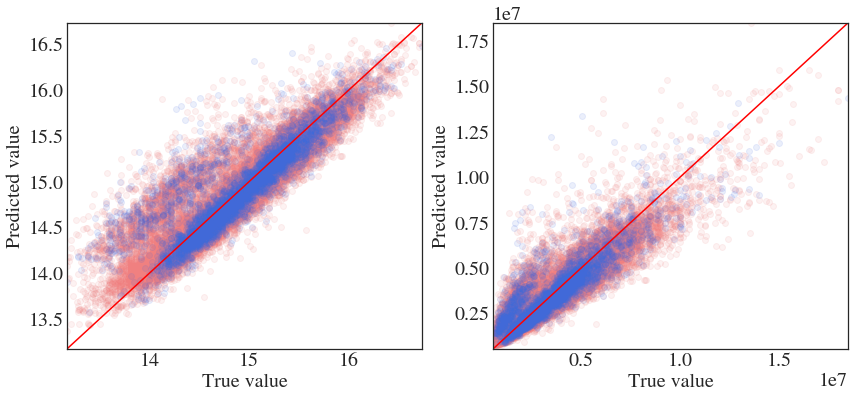

In [10]:

y_2plot(y_test, y_train, y_OLS, model_best_OLS)

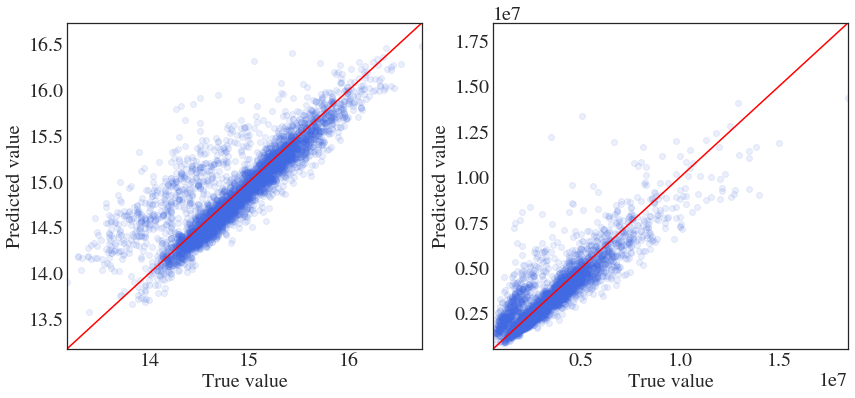

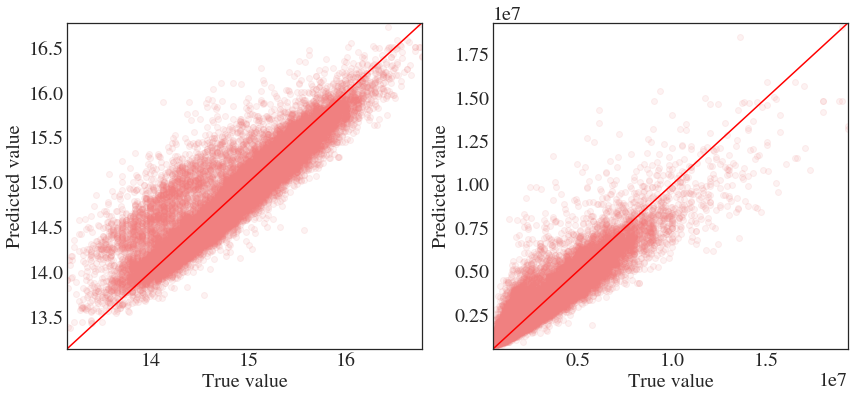

In [11]:
y_plot_blue(y_test, y_OLS)
y_plot_coral(y_train, model_best_OLS.predict(X_train))

OLS picked 159 variables and eliminated the other 0 variables


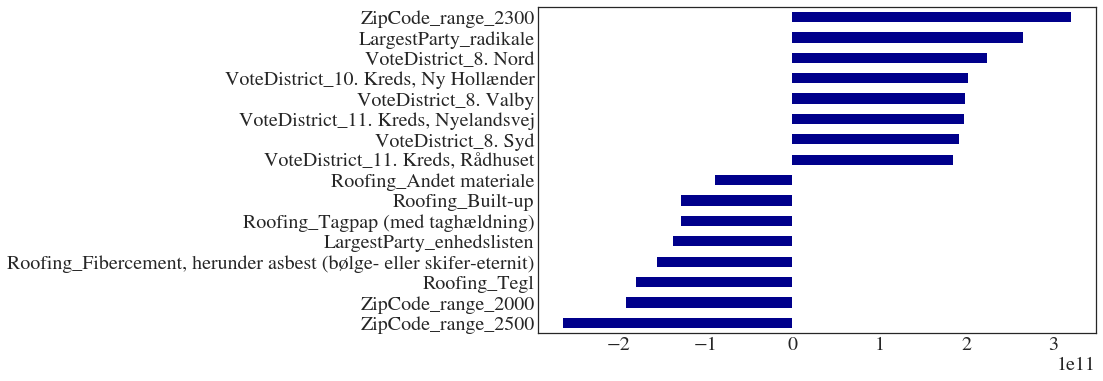

In [14]:
coef = pd.Series(model_best_OLS.coef_, index = X_train.columns)
print("OLS picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = pd.concat([coef.sort_values().head(8),
                     coef.sort_values().tail(8)])

plt.rcParams['figure.figsize'] = (10.0, 6.0)
imp_coef.plot(kind = "barh")
#plt.title("Coefficients in the Ridge Model")
plt.show()

In [17]:
def within20(y_pred, y_test):
    dataset = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test}, columns=['y_pred', 'y_test'])
    dataset['difference'] = abs(dataset.y_pred-dataset.y_test)
    dataset['diffpercent'] = dataset.difference / dataset.y_test *100
    return (len(dataset[dataset.diffpercent < 20]) / len(dataset)) *100


dataset = pd.DataFrame({'y_OLS': y_OLS, 'y_test': y_test, 'Type':y_test_type}, columns=['y_OLS', 'y_test','Type'])
dataset['exp_y_OLS'] = np.exp(dataset.y_OLS)
dataset['exp_y_test'] = np.exp(dataset.y_test)
dataset['residuals'] = dataset.y_test - dataset.y_OLS
dataset['model_norm_residuals_abs_sqrt'] = np.sqrt(np.abs(dataset.residuals))

# All
print(len(dataset[dataset.exp_y_OLS > dataset.exp_y_test]), len(dataset[dataset.exp_y_OLS <= dataset.exp_y_test]), len(dataset))
print(within20(dataset.exp_y_OLS, dataset.exp_y_test))

# Under 3m DKK
Under3 = dataset[dataset.exp_y_test < 3000000]
print(len(Under3[Under3.exp_y_OLS > Under3.exp_y_test]), len(Under3[Under3.exp_y_OLS <= Under3.exp_y_test]), len(Under3))
print(len(Under3[Under3.exp_y_OLS > Under3.exp_y_test]) / len(Under3) *100)
overvalued = Under3[Under3.exp_y_OLS > Under3.exp_y_test]
print(within20(overvalued.exp_y_OLS, overvalued.exp_y_test))

# Over 8m DKK
Over8 = dataset[dataset.exp_y_test > 8000000]
print(len(Over8[Over8.exp_y_OLS > Over8.exp_y_test]), len(Over8[Over8.exp_y_OLS <= Over8.exp_y_test]), len(Over8))
print(within20(Over8.exp_y_OLS, Over8.exp_y_test))


Under4 = dataset[dataset.exp_y_test < 3000000]
print(len(Under4[Under4.exp_y_OLS > Under4.exp_y_test]), len(Under4[Under4.exp_y_OLS <= Under4.exp_y_test]), len(Under4))

OverValued = Under4[Under4.exp_y_OLS > Under4.exp_y_test]
UnderValued = Under4[Under4.exp_y_OLS <= Under4.exp_y_test]



within20(OverValued.exp_y_OLS, OverValued.exp_y_test)
within20(UnderValued.exp_y_OLS, UnderValued.exp_y_test)

dataset[dataset.exp_y_test >= 3000000].shape


1704 2800 4504
77.99733570159859
1063 1340 2403
44.236371202663335
49.67074317968015
25 92 117
66.66666666666666
1063 1340 2403


(2101, 7)

### Model Diagnostics

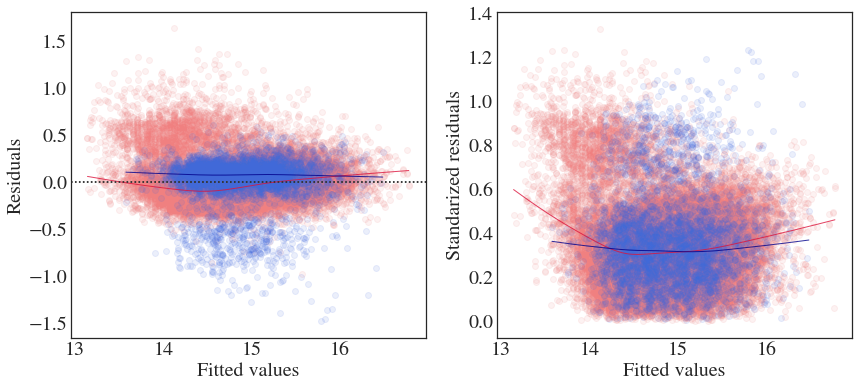

In [18]:
Residual2Plots(y_test, y_train, y_OLS, model_best_OLS)

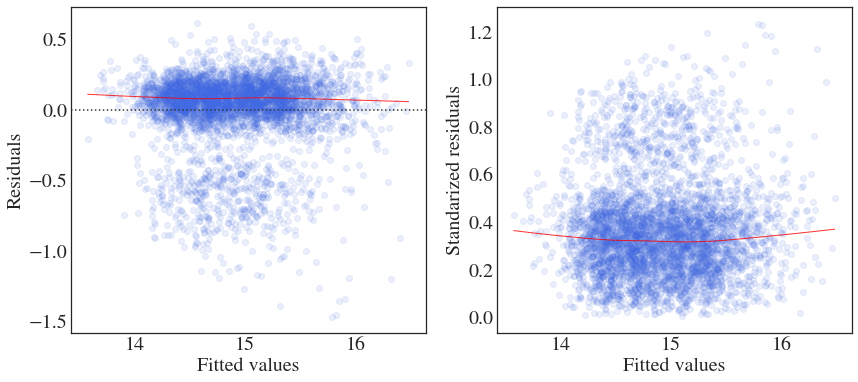

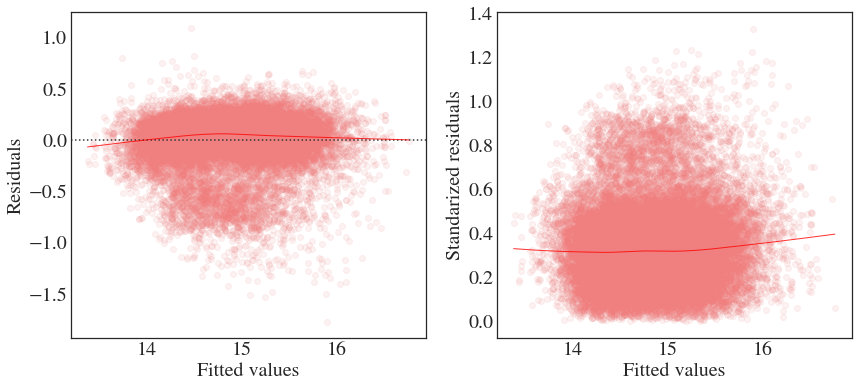

In [19]:
ResidualPlots(y_test, y_OLS)
ResidualPlotsCoral(y_train, model_best_OLS.predict(X_train))

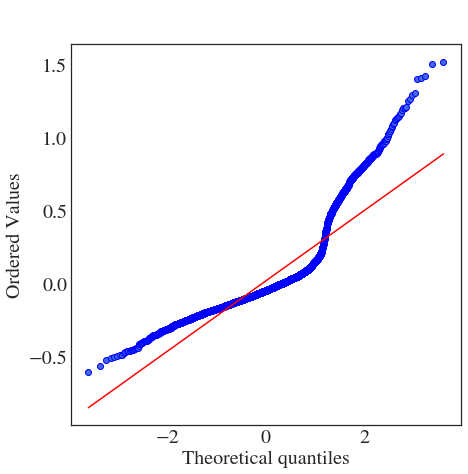

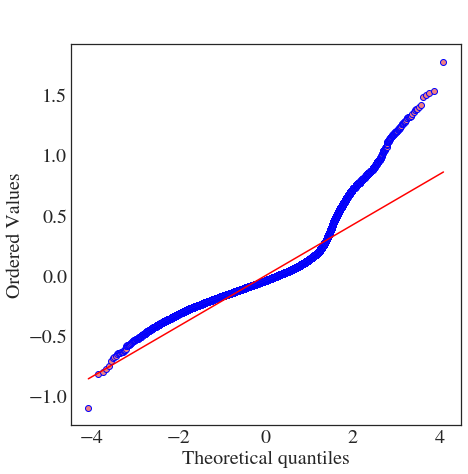

In [20]:
y_pred = y_OLS

residuals =- y_test + y_pred
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
stats.probplot(residuals, dist=norm, plot=plt, fit=True)
# Change colour of scatter
ax.get_lines()[0].set_markerfacecolor('royalblue')
plt.title(" ")
#plt.title("Normal Q-Q Plot")
plt.show()


residualss =- y_train +  model_best_OLS.predict(X_train)
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
stats.probplot(residualss, dist=norm, plot=plt, fit=True)
# Change colour of scatter
ax.get_lines()[0].set_markerfacecolor('lightcoral')
plt.title(" ")
#plt.title("Normal Q-Q Plot")
plt.show()



In [21]:
# Get the variance of (absolute) residuals
print(np.var(np.abs(y_test - y_OLS)))
print(np.var((y_test - y_OLS)))

0.04194571653277364
0.07203063334197804


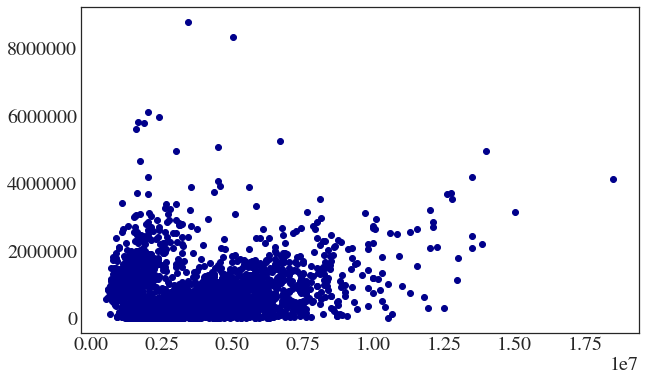

In [22]:

xx = np.exp(y_test)
yy = np.abs(np.exp(y_test) - np.exp(y_OLS))

plt.scatter(xx,yy)

In [23]:
################################################
##### Look further at the residuals < -0.5 #####
################################################

#lowresid = ((y_test - y_OLS) < -1).index.tolist()
#lowresid = pd.DataFrame(((y_test - y_OLS) < -1).index.tolist())
#lowresid.to_csv('Endeligt data/lowresid.csv', index=False)


preds = pd.DataFrame({"preds":(np.exp(y_OLS)), "true":(np.exp(y_test))})
preds["residuals"] = preds["true"] - preds["preds"]

a = preds[preds.residuals < -0.5].index.tolist()
a

[6,
 45,
 49,
 52,
 54,
 65,
 117,
 156,
 217,
 239,
 299,
 348,
 355,
 415,
 418,
 442,
 463,
 465,
 505,
 553,
 560,
 580,
 637,
 643,
 675,
 687,
 716,
 743,
 757,
 764,
 779,
 787,
 806,
 863,
 943,
 1008,
 1023,
 1026,
 1038,
 1039,
 1047,
 1061,
 1066,
 1097,
 1101,
 1103,
 1108,
 1125,
 1152,
 1159,
 1171,
 1179,
 1183,
 1197,
 1205,
 1218,
 1249,
 1296,
 1327,
 1358,
 1422,
 1455,
 1494,
 1500,
 1600,
 1604,
 1635,
 1687,
 1690,
 1692,
 1715,
 1726,
 1728,
 1729,
 1810,
 1873,
 1937,
 1939,
 1955,
 1966,
 1969,
 1999,
 2007,
 2012,
 2046,
 2059,
 2071,
 2078,
 2091,
 2092,
 2122,
 2138,
 2161,
 2163,
 2204,
 2236,
 2237,
 2252,
 2254,
 2256,
 2305,
 2306,
 2366,
 2371,
 2409,
 2418,
 2435,
 2442,
 2457,
 2507,
 2525,
 2605,
 2614,
 2665,
 2679,
 2738,
 2740,
 2747,
 2758,
 2762,
 2856,
 2859,
 2889,
 2898,
 2905,
 2906,
 2960,
 2965,
 2977,
 2978,
 3023,
 3036,
 3051,
 3070,
 3090,
 3101,
 3103,
 3109,
 3115,
 3129,
 3145,
 3206,
 3220,
 3252,
 3258,
 3326,
 3327,
 3329,
 3342,

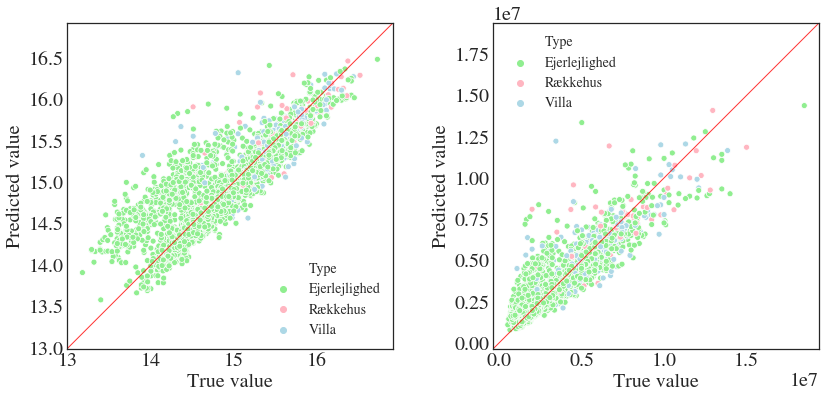

In [24]:
dataset = pd.DataFrame({'y_OLS': y_OLS, 'y_test': y_test, 'Type':y_test_type}, columns=['y_OLS', 'y_test','Type'])
dataset['exp_y_OLS'] = np.exp(dataset.y_OLS)
dataset['exp_y_test'] = np.exp(dataset.y_test)
dataset['residuals'] = dataset.y_test - dataset.y_OLS
dataset['model_norm_residuals_abs_sqrt'] = np.sqrt(np.abs(dataset.residuals))

flatui = ['lightgreen', 'lightpink', 'lightblue']


plt.rcParams['figure.figsize'] = (14, 6)
ax = plt.subplot(1,2,1)

ResponseY = sns.scatterplot(x="y_test", y="y_OLS", hue="Type", data=dataset, alpha=1, palette=flatui)
ResponseY.set_xlabel('True value')
ResponseY.set_ylabel('Predicted value')
plt.legend(fontsize=14)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.8, zorder=1, color='red',lw= 1)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax = plt.subplot(1,2,2)
ResponseY = sns.scatterplot(x="exp_y_test", y="exp_y_OLS", hue="Type", data=dataset, alpha=1, palette=flatui)
#ResponseY = sns.lmplot(x="exp_y_test", y="exp_y_OLS", hue="Type", data=dataset, markers=["o", "x", 'x'], ci=None)

ResponseY.set_xlabel('True value')
ResponseY.set_ylabel('Predicted value')
plt.legend(fontsize=14)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.8, zorder=1, color='red',lw= 1)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.show()



In [25]:
coef = pd.DataFrame(model_best_OLS.coef_, index = X_test.columns)
coef.loc[['Type_Ejerlejlighed', 'Type_Rækkehus', 'Type_Villa']]

0
Type_Ejerlejlighed -3.440893e+10
Type_Rækkehus      -2.081653e+10
Type_Villa         -2.868520e+10

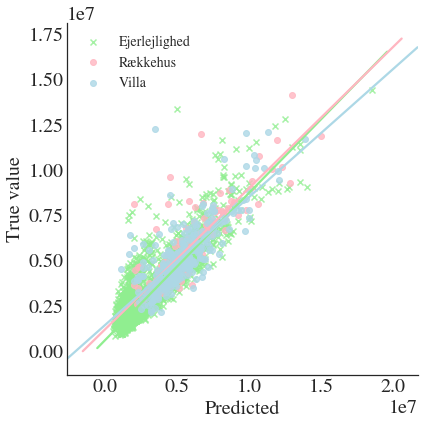

In [26]:
#fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
flatui = ['lightgreen', 'lightpink', 'lightblue']
sns.set_palette(sns.color_palette(flatui))

g = sns.lmplot(x="exp_y_test", y="exp_y_OLS", hue="Type", data=dataset, 
               markers=["x", "o", 'o'], ci=None, height=6, legend_out = False)

axes = g.axes.flatten()
axes[0].set_ylabel("True value")
for ax in axes:
    ax.set_xlabel("Predicted")

plt.legend(fontsize=14)

plt.show()

sns.set_palette(sns.color_palette('Paired'))


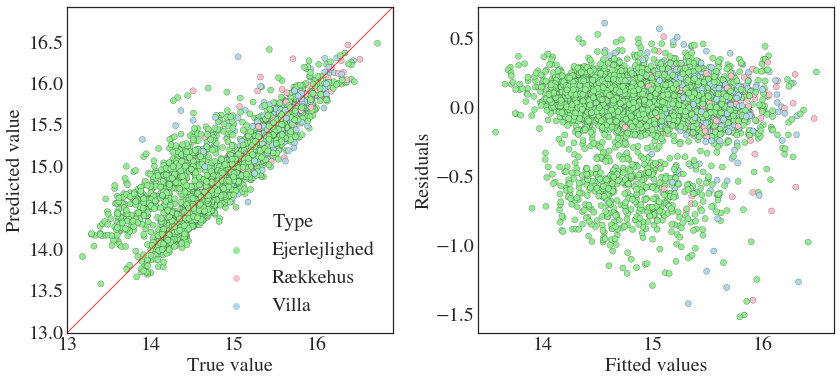

In [27]:
dataset = pd.DataFrame({'y_OLS': y_OLS, 'y_test': y_test, 'Type':y_test_type}, columns=['y_OLS', 'y_test','Type'])
datasett = pd.DataFrame({'y_train':y_train, 'y_OLS_train':model_best_OLS.predict(X_train), 'Type_train':y_train_type}, columns=['y_train', 'y_OLS_train', 'Type_train'])

dataset['exp_y_OLS'] = np.exp(dataset.y_OLS)
dataset['exp_y_test'] = np.exp(dataset.y_test)
dataset['residuals'] = dataset.y_test - dataset.y_OLS
dataset['model_norm_residuals_abs_sqrt'] = np.sqrt(np.abs(dataset.residuals))

flatui = ['lightgreen', 'pink', 'lightblue']
kwargs  =   {'edgecolor':"black", # for edge color
             'linewidth':0.2, # line width of spot
             #'linestyle':'-', # line style of spot
            }

plt.rcParams['figure.figsize'] = (14, 6)
ax = plt.subplot(1,2,1)

ResponseY = sns.scatterplot(x="y_test", y="y_OLS", hue="Type", data=dataset, alpha=1, palette=flatui, **kwargs)
ResponseY.set_xlabel('True value')
ResponseY.set_ylabel('Predicted value')
plt.legend(fontsize=20)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.8, zorder=1, color='red',lw= 1)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax = plt.subplot(1,2,2)
ResponseY = sns.scatterplot(x="y_OLS", y="residuals", hue="Type", data=dataset, alpha=1, palette=flatui, **kwargs, legend=False )
ResponseY.set_xlabel('Fitted values')
ResponseY.set_ylabel('Residuals')
#plt.legend(fontsize=18)

plt.show()



## Ridge

MSE, train: 0.05223
MAE, train: 0.15354
R^2, train: 0.82119
MSE, test: 0.07242
MAE, test: 0.17422
R^2, test: 0.73785


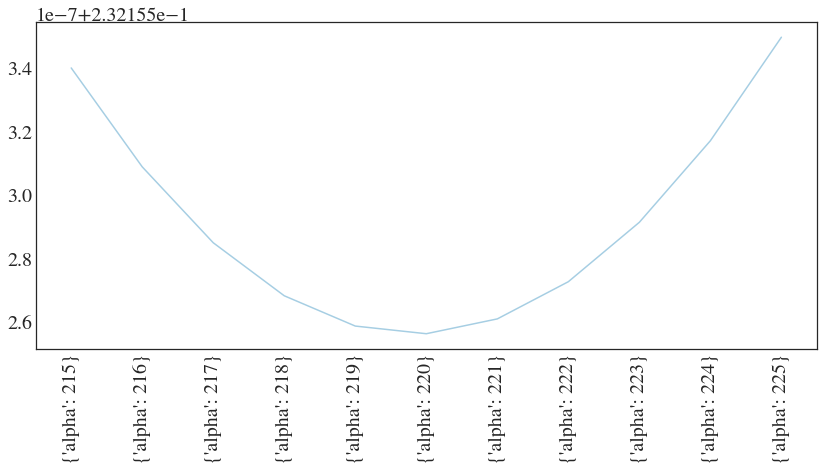

In [28]:
#parameters = {'alpha':[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]}
#parameters = {'alpha':[0.001, 0.01, 0.1, 1]}
#parameters = {'alpha':[10**2,90,80,70,60,50,40,30,20,10,5]}
#parameters = {'alpha':[200, 190, 180, 170, 160, 155, 150, 140, 130, 120, 110, 100]}
#parameters = {'alpha':[130, 132, 134, 136, 140, 142, 144, 146, 148, 150]}
#parameters = {'alpha':[110, 105, 100, 95, 90, 85, 80, 75, 70, 65, 60]}
#parameters = {'alpha':[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]}
#parameters = {'alpha':[74, 75, 76, 77, 78, 79, 80, 81, 82, 83]}
#parameters = {'alpha':[ 145, 140, 135, 130, 125, 120, 115]}
#parameters = {'alpha':[120, 121, 122, 123, 124, 125, 126, 127, 128, 129]}
#parameters = {'alpha':[172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184]}
parameters = {'alpha':[215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225]}
#parameters = {'alpha':[37, 38, 39, 40, 41, 42, 43, 44, 45, 46]}
#parameters = {'alpha':[210,220,230,240,250,260,270,280]}



model = Ridge(random_state=111)
score_ridge, y_ridge, model_ridge, model_best_ridge = CV_function(X_train,y_train,X_test,y_test,model,parameters)


In [29]:
model_ridge.best_params_

{'alpha': 220}

### With city (alpha = 140)
MSE, train: 0.05569
RMSE, train: 0.23599
MAE, test: 0.15767
R^2, train: 0.81228
RMSE, test: 0.27409
MAE, test: 0.17936
R^2, test: 0.73558

MSE, train: 0.05581
RMSE, train: 0.23624
MAE, test: 0.15797
R^2, train: 0.81189
RMSE, test: 0.27422
MAE, test: 0.17961
R^2, test: 0.73534

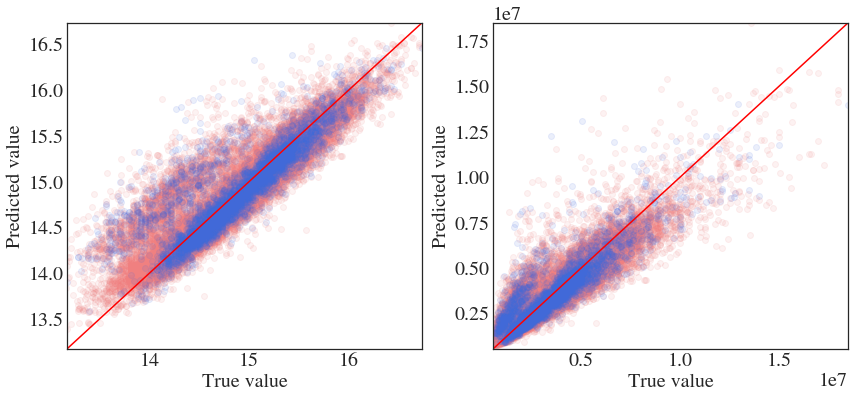

In [30]:
y_2plot(y_test, y_train, y_ridge, model_best_ridge)

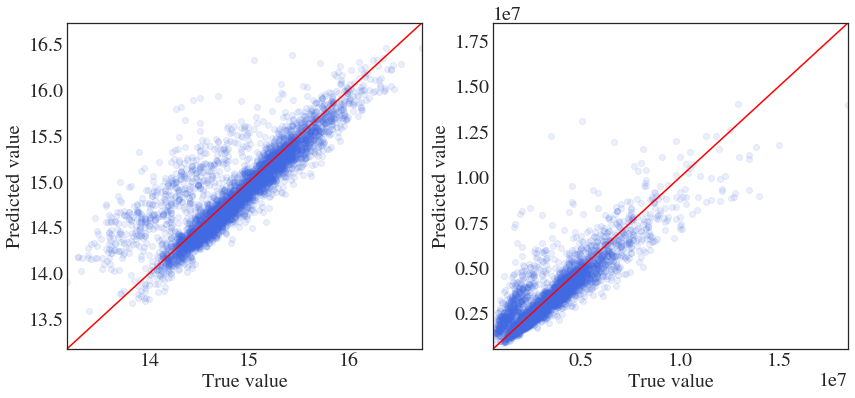

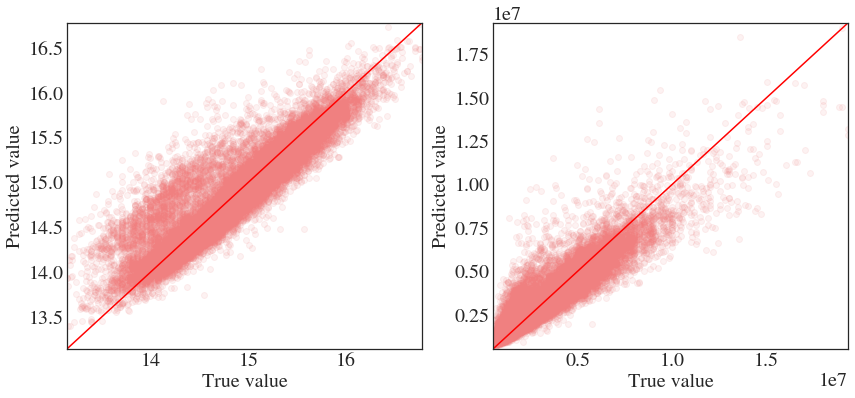

In [31]:
y_plot_blue(y_test, y_ridge)
y_plot_coral(y_train, model_best_ridge.predict(X_train))

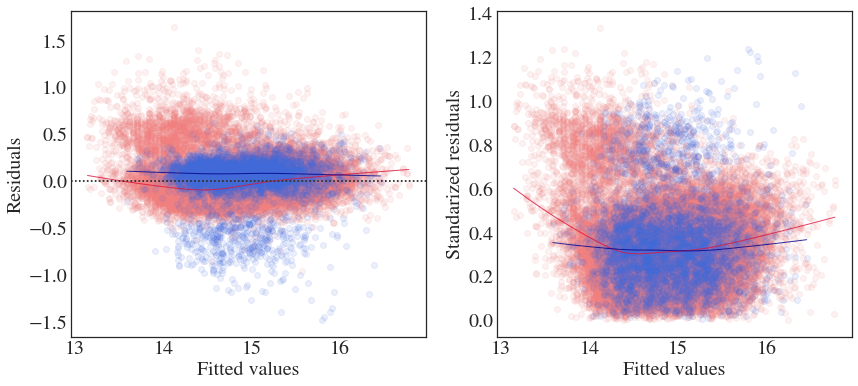

In [32]:
Residual2Plots(y_test, y_train, y_ridge, model_best_ridge)

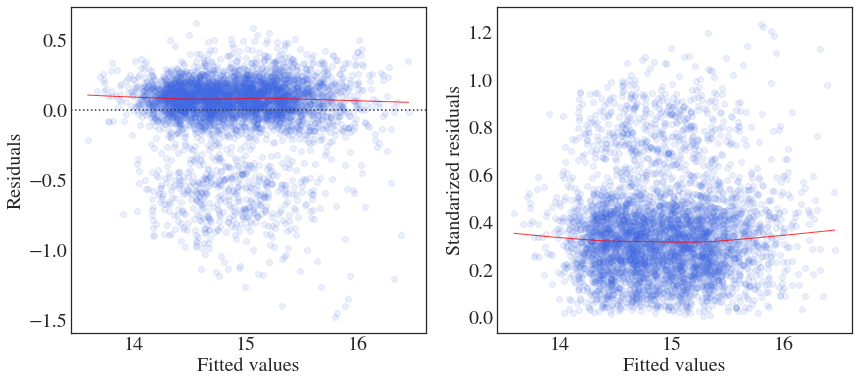

In [33]:
ResidualPlots(y_test, y_ridge)

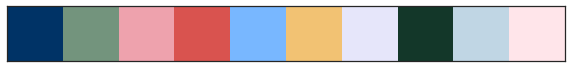

In [34]:
flatui = ["#003366", "#73947d", "#eea2ad", "#d9534f", "#78b7ff", "#f2c273", '#e6e6fa', '#133729', '#c0d6e4', '#ffe5ea']
sns.palplot(flatui)
sns.set_palette(sns.color_palette(flatui))


Ridge picked 159 variables and eliminated the other 0 variables


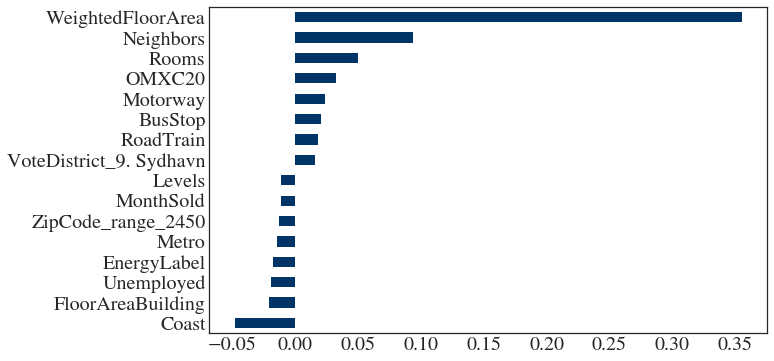

In [35]:

coef = pd.Series(model_best_ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = pd.concat([coef.sort_values().head(8),
                     coef.sort_values().tail(8)])

plt.rcParams['figure.figsize'] = (10.0, 6.0)
imp_coef.plot(kind = "barh")
#plt.title("Coefficients in the Ridge Model")
plt.show()

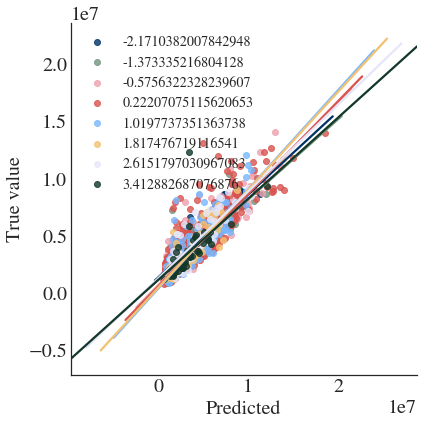

In [36]:
dataset = pd.DataFrame({'y_ridge': y_ridge, 'y_test': y_test, 'EnergyLabel':y_test_EnergyLabel}, columns=['y_ridge', 'y_test','EnergyLabel'])
dataset['exp_y_ridge'] = np.exp(dataset.y_ridge)
dataset['exp_y_test'] = np.exp(dataset.y_test)
dataset['residuals'] = dataset.y_test - dataset.y_ridge
dataset['model_norm_residuals_abs_sqrt'] = np.sqrt(np.abs(dataset.residuals))


g = sns.lmplot(x="exp_y_test", y="exp_y_ridge", hue="EnergyLabel", data=dataset, ci=None, height=6, legend_out = False)

axes = g.axes.flatten()
axes[0].set_ylabel("True value")
for ax in axes:
    ax.set_xlabel("Predicted")

plt.legend(fontsize=14)

plt.show()

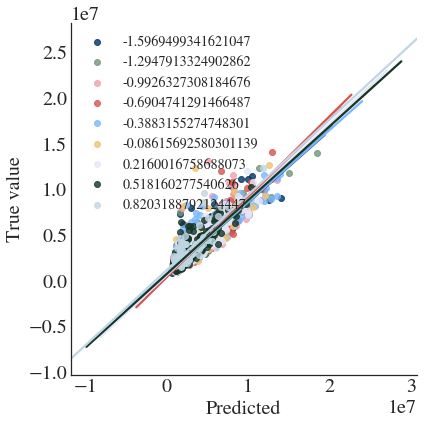

In [37]:
dataset = pd.DataFrame({'y_ridge': y_ridge, 'y_test': y_test, 'MonthSold':y_test_MonthSold}, columns=['y_ridge', 'y_test','MonthSold'])
dataset['exp_y_ridge'] = np.exp(dataset.y_ridge)
dataset['exp_y_test'] = np.exp(dataset.y_test)
dataset['residuals'] = dataset.y_test - dataset.y_ridge
dataset['model_norm_residuals_abs_sqrt'] = np.sqrt(np.abs(dataset.residuals))


#fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
#flatui = ['lightgreen', 'lightpink', 'lightblue']
#sns.set_palette(sns.color_palette(flatui))

g = sns.lmplot(x="exp_y_test", y="exp_y_ridge", hue="MonthSold", data=dataset, ci=None, height=6, legend_out = False)

axes = g.axes.flatten()
axes[0].set_ylabel("True value")
for ax in axes:
    ax.set_xlabel("Predicted")

plt.legend(fontsize=14)

plt.show()

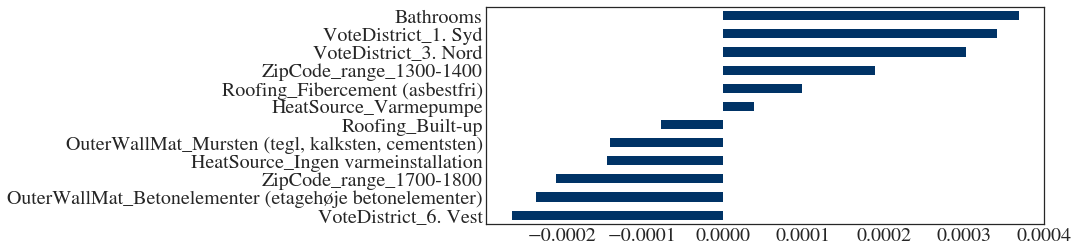

In [38]:
mid = int(len(coef.sort_values()) / 2)
mid_coef = pd.concat([coef.sort_values()[mid -11:mid ], coef.sort_values()[mid:mid+1]])

plt.rcParams['figure.figsize'] = (10.0, 4.0)
mid_coef.plot(kind = "barh")
#plt.title("Small coefficients in the Ridge Model")
plt.show()

In [39]:
print(mid_coef[abs(mid_coef) < 0.01].shape)
mid_coef[abs(mid_coef) < 0.01]

(12,)


VoteDistrict_6. Vest                                     -0.000263
OuterWallMat_Betonelementer (etagehøje betonelementer)   -0.000232
ZipCode_range_1700-1800                                  -0.000207
HeatSource_Ingen varmeinstallation                       -0.000144
OuterWallMat_Mursten (tegl, kalksten, cementsten)        -0.000141
Roofing_Built-up                                         -0.000076
HeatSource_Varmepumpe                                     0.000038
Roofing_Fibercement (asbestfri)                           0.000099
ZipCode_range_1300-1400                                   0.000189
VoteDistrict_3. Nord                                      0.000302
VoteDistrict_1. Syd                                       0.000341
Bathrooms                                                 0.000369
dtype: float64

In [40]:
results = pd.DataFrame(model_ridge.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.064685      0.013115         0.002562        0.000154         215   
1        0.061423      0.002099         0.002768        0.000698         216   
2        0.060863      0.001510         0.002554        0.000208         217   
3        0.059126      0.001843         0.002483        0.000192         218   
4        0.060762      0.002316         0.002515        0.000067         219   
5        0.063332      0.004049         0.002619        0.000152         220   
6        0.063835      0.001624         0.002717        0.000343         221   
7        0.063895      0.002934         0.002840        0.000297         222   
8        0.076066      0.008724         0.003938        0.002376         223   
9        0.066002      0.003698         0.002669        0.000306         224   
10       0.061194      0.001573         0.002517        0.000320         225   

            params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 215}          -0.056176          -0.045226          -0.060717   
1   {'alpha': 216}          -0.056177          -0.045226          -0.060717   
2   {'alpha': 217}          -0.056177          -0.045227          -0.060718   
3   {'alpha': 218}          -0.056177          -0.045228          -0.060718   
4   {'alpha': 219}          -0.056178          -0.045228          -0.060719   
5   {'alpha': 220}          -0.056178          -0.045229          -0.060720   
6   {'alpha': 221}          -0.056178          -0.045229          -0.060720   
7   {'alpha': 222}          -0.056179          -0.045230          -0.060721   
8   {'alpha': 223}          -0.056179          -0.045231          -0.060721   
9   {'alpha': 224}          -0.056179          -0.045231          -0.060722   
10  {'alpha': 225}          -0.056180          -0.045232          -0.060723   

    split3_test_score  split4_test_score  split5_test_score  \
0           -0.053527          -0.049474          -0.049697   
1           -0.053526          -0.049474          -0.049698   
2           -0.053526          -0.049475          -0.049699   
3           -0.053525          -0.049475          -0.049699   
4           -0.053525          -0.049476          -0.049700   
5           -0.053525          -0.049476          -0.049701   
6           -0.053524          -0.049477          -0.049702   
7           -0.053524          -0.049477          -0.049703   
8           -0.053523          -0.049477          -0.049704   
9           -0.053523          -0.049478          -0.049704   
10          -0.053523          -0.049478          -0.049705   

    split6_test_score  split7_test_score  split8_test_score  \
0           -0.057444          -0.060584          -0.047928   
1           -0.057442          -0.060584          -0.047928   
2           -0.057440          -0.060584          -0.047929   
3           -0.057438          -0.060583          -0.047929   
4           -0.057436          -0.060583          -0.047930   
5           -0.057435          -0.060583          -0.047930   
6           -0.057433          -0.060583          -0.047931   
7           -0.057431          -0.060582          -0.047931   
8           -0.057430          -0.060582          -0.047932   
9           -0.057428          -0.060582          -0.047932   
10          -0.057426          -0.060582          -0.047933   

    split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           -0.058189        -0.053896        0.005250               10  
1           -0.058188        -0.053896        0.005249                8  
2           -0.058187        -0.053896        0.005249                6  
3           -0.058186        -0.053896        0.005248                4  
4           -0.058185        -0.053896        0.005248                2  
5           -0.058184        -0.053896        0.005248                1  
6           -0.058183        -0.053896        0.005247        

## Lasso

MSE, train: 0.05241
MAE, train: 0.15371
R^2, train: 0.82058
MSE, test: 0.07237
MAE, test: 0.17490
R^2, test: 0.73803


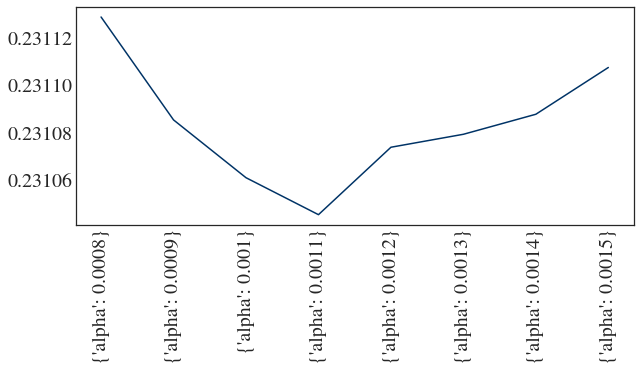

In [41]:
#parameters = {'alpha':[1.e-6, 1.e-5, 1.e-4, 1.e-3, 1.e-2, 1.e-1]}
#parameters = {'alpha':[0.0001, 0.0003, 0.0005, 0.0007, 0.0009, 0.001, 0.003, 0.005, 0.007, 0.009, 0.01]}
parameters = {'alpha':[0.0008, 0.0009, 0.0010, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015]}
#parameters = {'alpha':[0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002]}


model = Lasso(random_state=111, tol=0.01,max_iter=3000)

score_lasso, y_lasso, model_lasso, model_best_lasso = CV_function(X_train,y_train,X_test,y_test,model,parameters)

In [42]:
model_best_lasso.alpha

0.0011

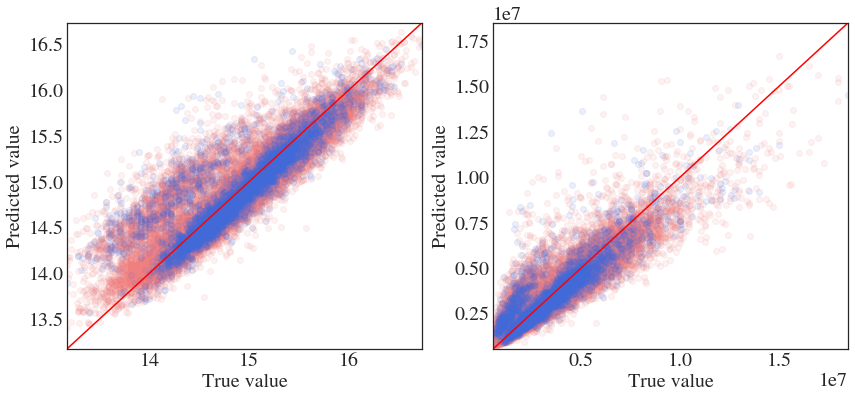

In [43]:
y_2plot(y_test, y_train, y_lasso, model_best_lasso)

In [44]:
#y_plot_blue(y_test, y_lasso)
#y_plot_coral(y_train, model_best_lasso.predict(X_train))

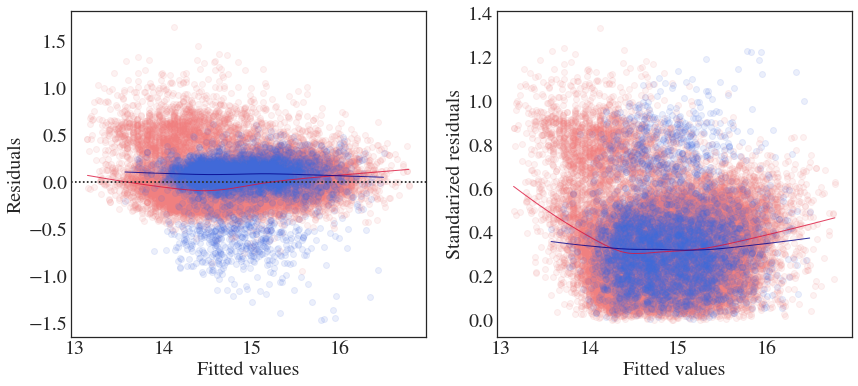

In [45]:
Residual2Plots(y_test, y_train, y_lasso, model_best_lasso)

Lasso picked 104 variables and eliminated the other 55 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

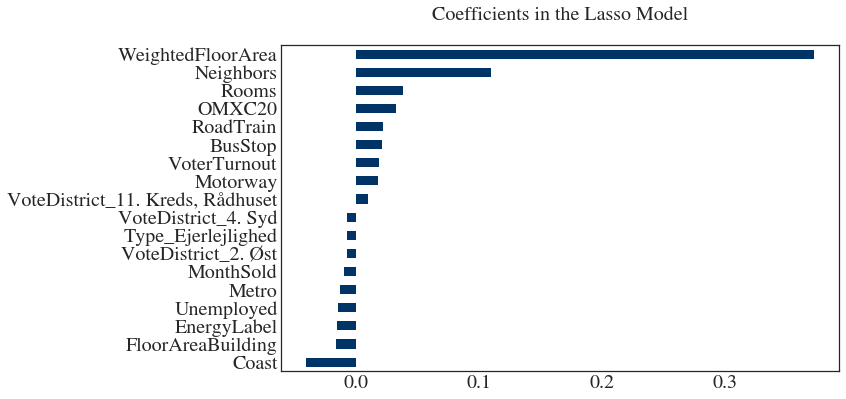

In [46]:
coef = pd.Series(model_best_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = pd.concat([coef.sort_values().head(9),
                     coef.sort_values().tail(9)])

plt.rcParams['figure.figsize'] = (10.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [47]:
coef[coef == 0]
coef[coef == 0].index

Index(['BasementArea', 'Bathrooms', 'FloorsTotal', 'Toilets',
       'WorthPreserving', 'Doctor', 'PublicBath', 'SportsHall', 'BuildAge',
       'PriceIndex',
       'HeatSource_Fjernvarme/blokvarme (radiatorsystemer el. varmluftanlæg)',
       'HeatSource_Ingen varmeinstallation',
       'HeatSource_Ovne (kakkelovne, kamin, brændeovne o.l.)',
       'HeatSource_Varmepumpe', 'ZipCode_range_1300-1400',
       'ZipCode_range_1450-1500', 'ZipCode_range_1500-1600',
       'ZipCode_range_1700-1800', 'ZipCode_range_1850-1900',
       'ZipCode_range_2100', 'ZipCode_range_2200', 'ZipCode_range_2300',
       'ZipCode_range_2450', 'ZipCode_range_2500', 'ZipCode_range_2700',
       'ZipCode_range_2720',
       'OuterWallMat_Betonelementer (etagehøje betonelementer)',
       'OuterWallMat_Bindingsværk (med udvendigt synligt træværk)',
       'OuterWallMat_Glas', 'OuterWallMat_Metalplader',
       'OuterWallMat_Mursten (tegl, kalksten, cementsten)',
       'OuterWallMat_Plader af fibercement, herun

## Elastic Net

MSE, train: 0.05241
MAE, train: 0.15381
R^2, train: 0.82057
MSE, test: 0.07233
MAE, test: 0.17489
R^2, test: 0.73817


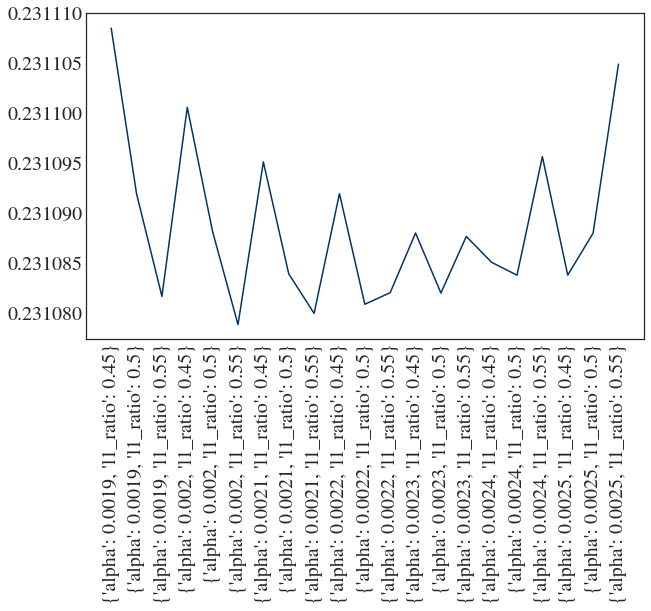

In [48]:
#parameters = {'alpha':[1.e-5, 1.e-4, 1.e-3, 1.e-2, 0.05]}
#parameters = {'alpha':[0.0001, 0.0003, 0.0005, 0.0007, 0.0009, 0.001, 0.003, 0.005, 0.007, 0.009, 0.01]}
#parameters = {'alpha':[0.0019, 0.0020, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025]}
#parameters = {'alpha':[0.0026, 0.0027, 0.0028, 0.0029, 0.0030, 0.0031, 0.0032, 0.0033]}
#parameters = {"max_iter": [1, 5, 10], 'alpha':[0.0019, 0.0020, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025], "l1_ratio": np.arange(0.0, 1.0, 0.1)}
#np.linspace(0.1,1,10).tolist()
#parameters = {'l1_ratio': [np.linspace(0.1,1,10).tolist()],
#              'alpha':[0.0001, 0.001, 0.01]}
parameters = {'l1_ratio': [0.45, 0.5, 0.55],
              'alpha':[0.0019, 0.0020, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025]}

model = ElasticNet(random_state=111)
score_ENet, y_ENet, model_ENet, model_best_ENet =CV_function(X_train,y_train,X_test,y_test,model,parameters)


In [49]:
print(model_best_ENet.alpha, model_best_ENet.l1_ratio)

0.002 0.55


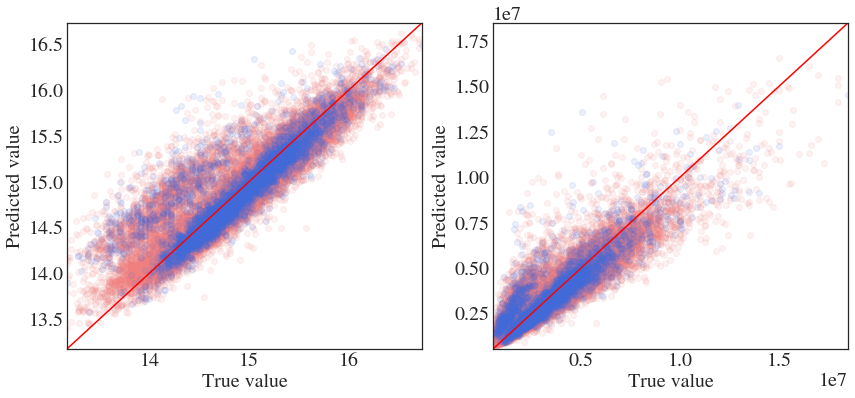

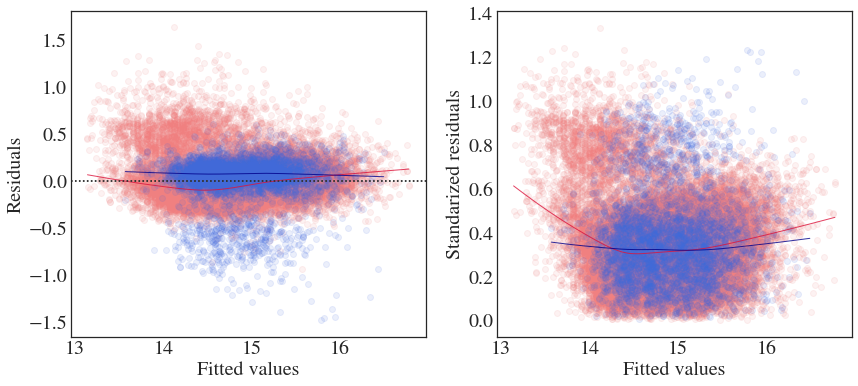

In [50]:
y_2plot(y_test, y_train, y_ENet, model_best_ENet)
Residual2Plots(y_test, y_train, y_ENet, model_best_ENet)

In [51]:
#y_plot_blue(y_test, y_ENet)
#y_plot_coral(y_train, model_best_ENet.predict(X_train))

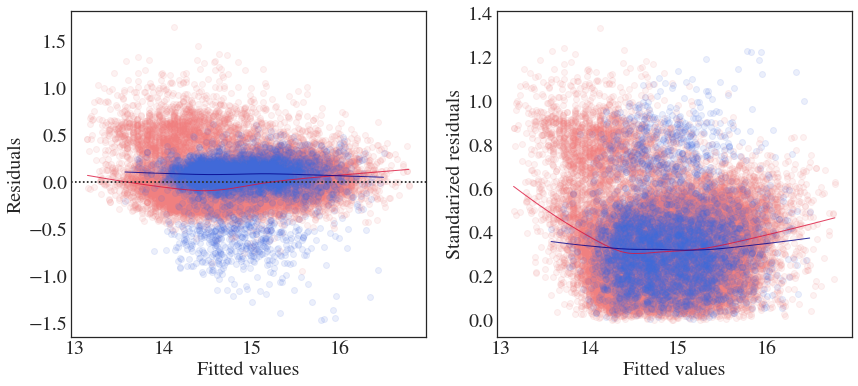

In [52]:
Residual2Plots(y_test, y_train, y_lasso, model_best_lasso)

Elastic Net picked 99 variables and eliminated the other 60 variables


Text(0.5, 1.0, 'Coefficients in the Elastic Net Model')

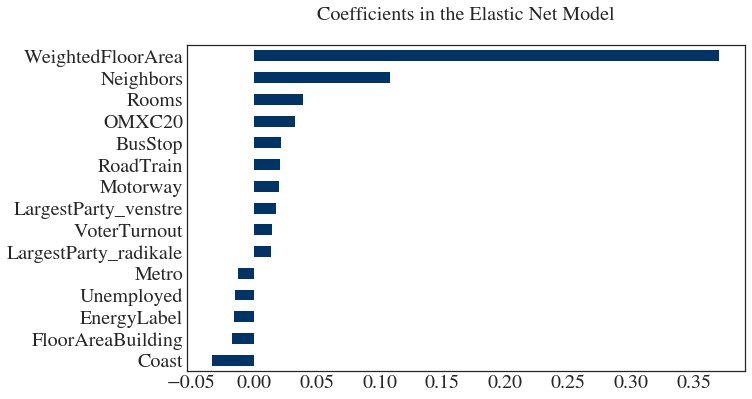

In [53]:
coef = pd.Series(model_best_ENet.coef_, index = X_train.columns)
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = pd.concat([coef.sort_values().head(5),
                     coef.sort_values().tail(10)])

plt.rcParams['figure.figsize'] = (10.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model")

In [54]:
imp_coef = pd.concat([coef.sort_values()[-10:],
                     coef.sort_values()[:5]])

pd.DataFrame(data=[imp_coef]).T

0
LargestParty_radikale  0.013852
VoterTurnout           0.014654
LargestParty_venstre   0.017751
Motorway               0.020331
RoadTrain              0.020360
BusStop                0.021790
OMXC20                 0.032966
Rooms                  0.039422
Neighbors              0.108035
WeightedFloorArea      0.370426
Coast                 -0.033223
FloorAreaBuilding     -0.017181
EnergyLabel           -0.015888
Unemployed            -0.015423
Metro                 -0.012920

## Decision Tree Regressor

{'max_features': ['auto'], 'max_depth': [5, 5, 6, 6, 7, 7, 8, 8, 9, 10], 'min_samples_leaf': [1, 2, 5]}
MSE, train: 0.05410
MAE, train: 0.16016
R^2, train: 0.81477
MSE, test: 0.07723
MAE, test: 0.18722
R^2, test: 0.72046


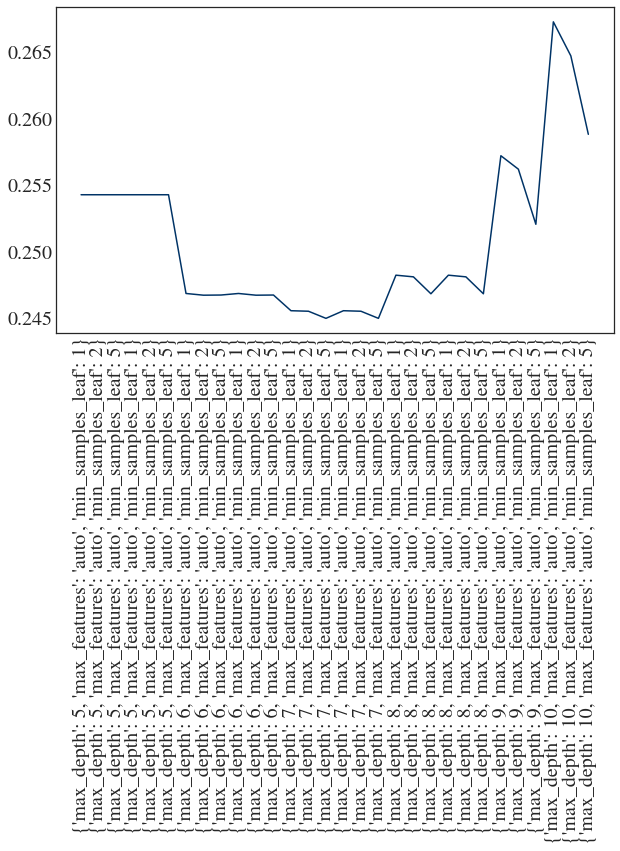

In [55]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 10)]

# Minimum number of samples required to split a node
#min_samples_split = [1,2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
parameters = {
               'max_features': max_features,
               'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
}

print(parameters)


model = DecisionTreeRegressor(random_state=111)
score_Tree, y_Tree, model_Tree, model_best_Tree =CV_function(X_train,y_train,X_test,y_test,model,parameters)

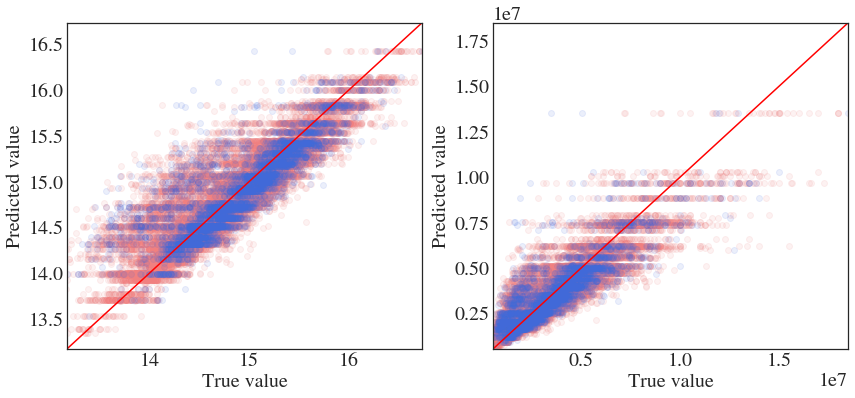

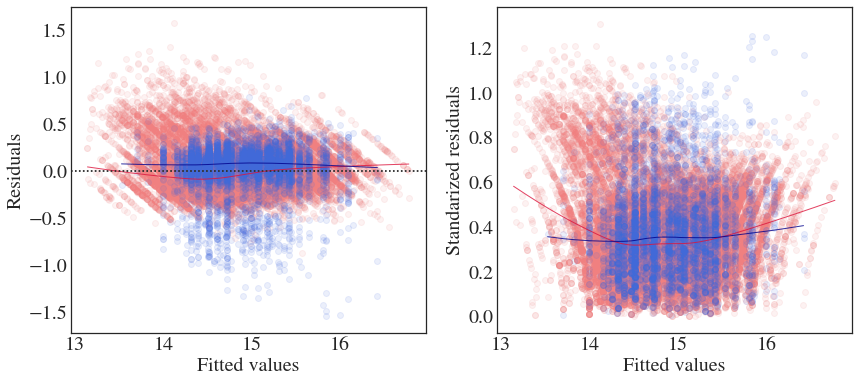

In [56]:
y_2plot(y_test, y_train, y_Tree, model_best_Tree)
Residual2Plots(y_test, y_train, y_Tree, model_best_Tree)

In [57]:
model_best_Tree.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(criterion='mse', max_depth=7, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=111, splitter='best')>

## Random Forest

{'max_features': ['auto'], 'max_depth': [5, 5, 6, 6, 7, 7, 8, 8, 9, 10], 'min_samples_leaf': [1, 2, 5]}


/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.p

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.p

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.p

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.p

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.p

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.p

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.p

Executing shutdown due to inactivity...


2020-07-11 16:40:45,274 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2020-07-11 16:40:45,521 - INFO     - Executing shutdown...
/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/joje/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



MSE, train: 0.04313
MAE, train: 0.14023
R^2, train: 0.85234
MSE, test: 0.07373
MAE, test: 0.18026
R^2, test: 0.73311


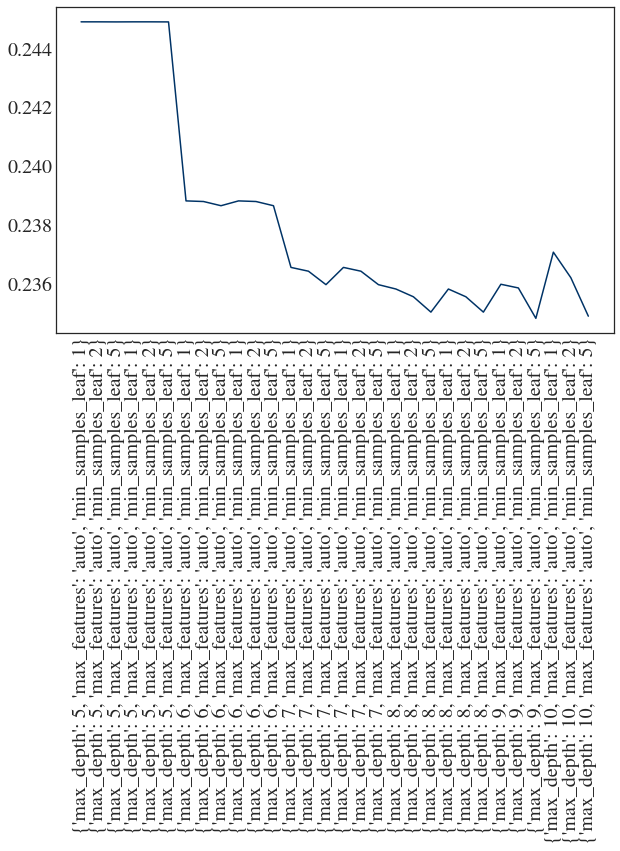

In [58]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 10)]

# Minimum number of samples required to split a node
#min_samples_split = [1,2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
parameters = {
               'max_features': max_features,
               'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
}

print(parameters)


model = RandomForestRegressor(random_state=111)
score_RF, y_RF, model_RF, model_best_RF =CV_function(X_train,y_train,X_test,y_test,model,parameters)


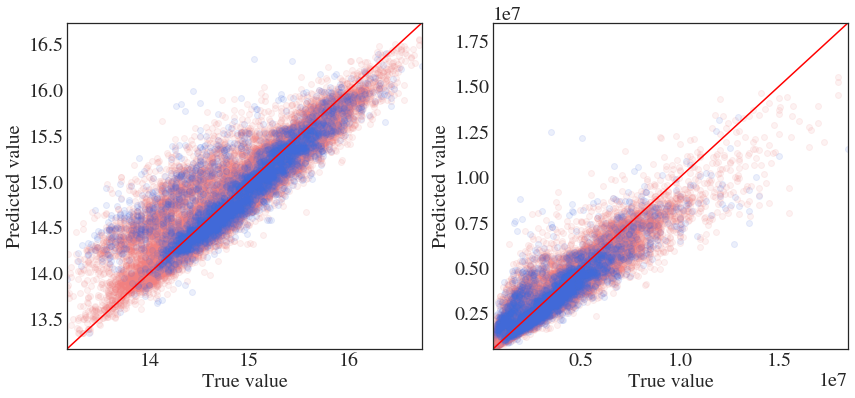

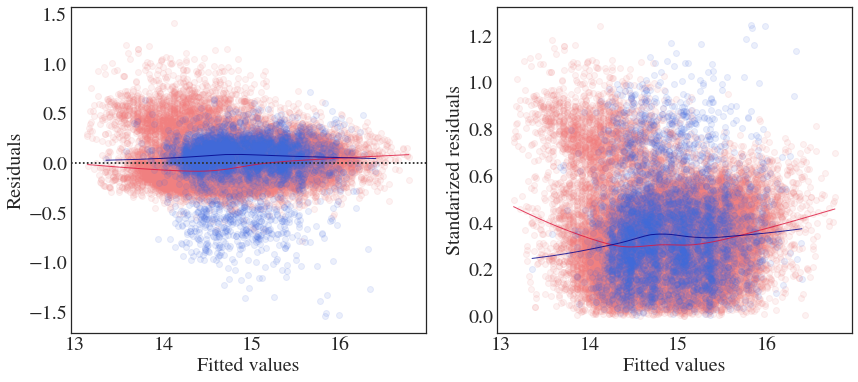

In [59]:
y_2plot(y_test, y_train, y_RF, model_best_RF)
Residual2Plots(y_test, y_train, y_RF, model_best_RF)

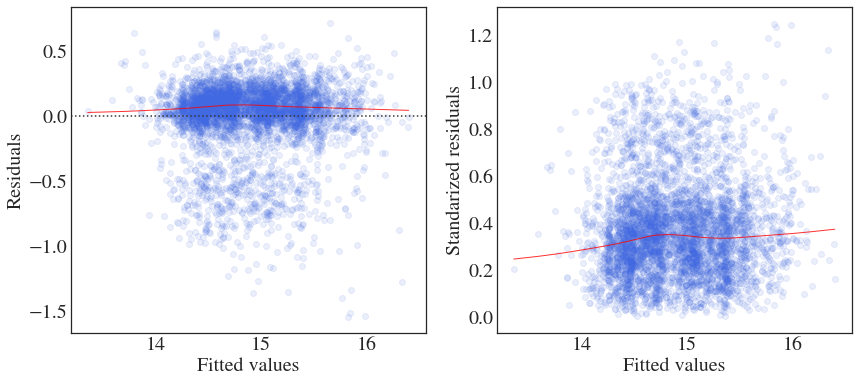

In [60]:
ResidualPlots(y_test, y_RF)

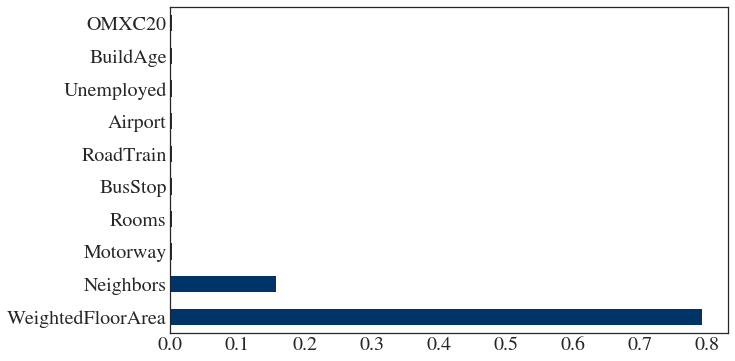

In [61]:
feat_importances = pd.Series(model_best_RF.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

# Comparison

In [62]:
def get_score(y_true, y_pred):
    d = (y_true - y_pred)
    
    MSE1 = np.square(d).mean()
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = np.mean(abs(d))
    r21 = 1-(sum(d**2)/sum((y_true-np.mean(y_true))**2))
    r2 = r2_score(y_true, y_pred)
    Removed_obs = 4504 - len(y_true)
    
    score = [MSE, MAE, r2, Removed_obs] 
    return score

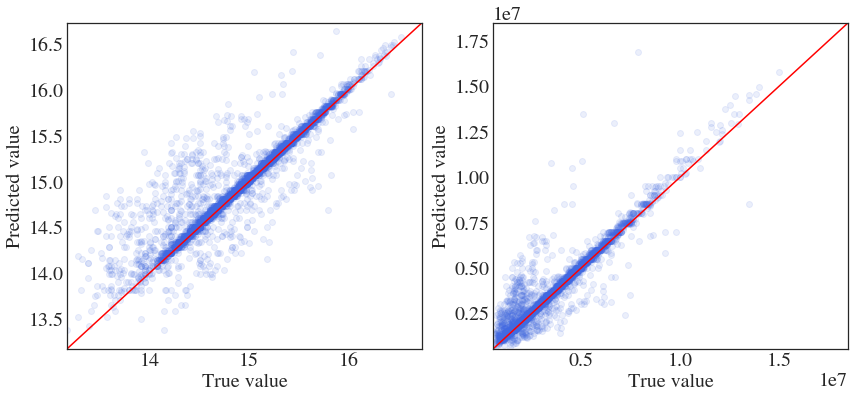

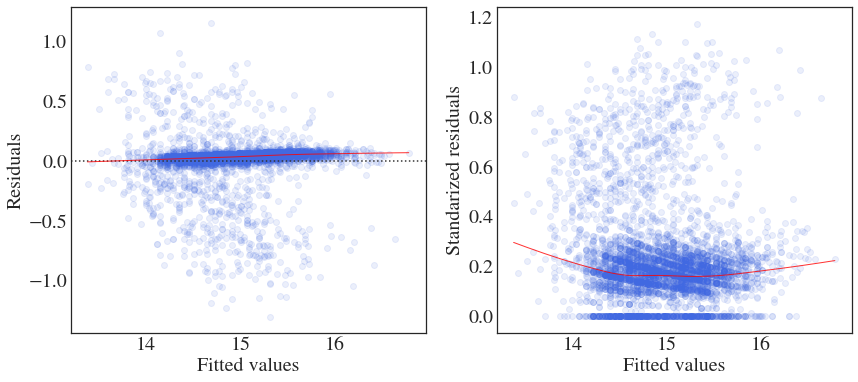

In [63]:
#################################
######## y_test_askprice ########
#################################
score_Asking = get_score(y_test, y_test_askprice)

y_plot_blue(y_test, y_test_askprice)
ResidualPlots(y_test, y_test_askprice)

In [64]:
ask = pd.DataFrame(data=[np.exp(y_test_askprice), np.exp(y_test)]).T

ask['residuals'] = ask.AskingPrice - ask.SalePrice

print(len(ask.residuals), len(ask.residuals[ask.residuals < 0]), len(ask.residuals[ask.residuals > 0]), len(ask.residuals[ask.residuals == 0]) )

#residuals[(residuals[residuals > 0])]

nyy = ask[ask.residuals > 0]
print(len(nyy))

print(nyy[nyy.AskingPrice < 4000000].shape)

print(nyy[nyy.AskingPrice > 10000000].shape)

4504 695 3466 343
3466
(2387, 3)
(45, 3)


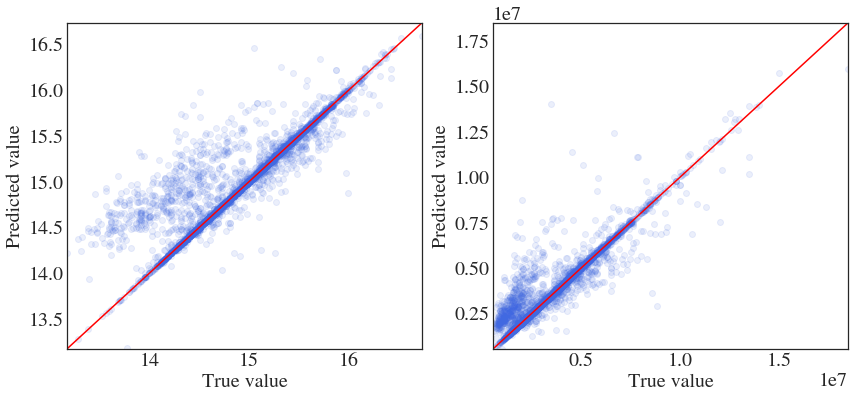

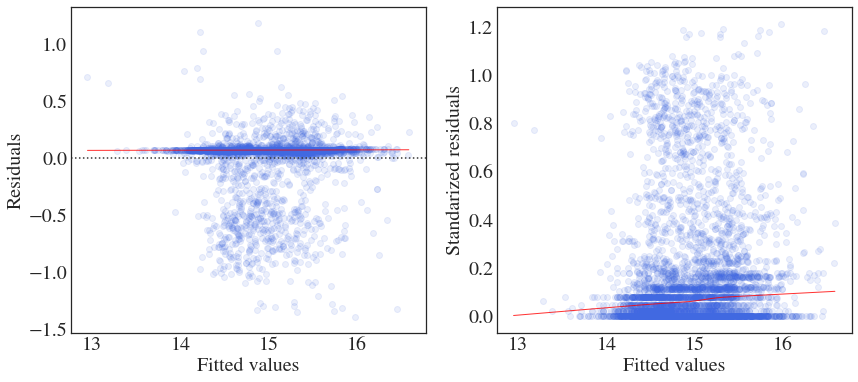

In [65]:
#################################
########    y_test_AVM   ########
#################################
# Remove NAN values in GeomaticAVMPrice (4526 - 4521 = 5)
Test = Test.dropna(axis=0, subset=['GeomaticAVMPrice'])
y_test = Test['SalePrice']
y_test_askprice = Test['AskingPrice']
y_test_AVM = Test['GeomaticAVMPrice']
y_test_off = Test['OffVurdering']
X_test = Test.drop(columns=['SalePrice', 'AskingPrice', 'GeomaticAVMPrice', 'OffVurdering', 'SaleDate'])

score_AVM = get_score(y_test, y_test_AVM)

y_plot_blue(y_test, y_test_AVM)
ResidualPlots(y_test, y_test_AVM)

In [66]:
# No city 
df = pd.read_csv('Endeligt data/df_modell.csv')

# Split into y and X 
y_save = df.loc[:, df.columns.isin(['GeomaticAVMPrice', 'AskingPrice', 'TurnoverTime', 'OfferingEnd', 'OfferingStart', 'SaleDate', 'Time', 'ValDate', 'LandValue', 'TaxableValue', 'Type', 'EnergyLabel', 'MonthSold'])]
y = df.loc[:, df.columns.isin(['SalePrice'])]
X_save = df.loc[:, df.columns.isin(['LinkGeo', 'LinkBoligsiden', 'Address'])]
X = df.loc[:, ~df.columns.isin(['SaleDateNum','RadonRisk','LinkGeo', 'LinkBoligsiden', 'Address', 'Lokation', 'Quarter', 'Year','YearQuarter','SalePrice', 'TurnoverTime', 'OfferingEnd', 'OfferingStart', 'SaleDate', 'Time', 'ValDate', 'Latitude', 'Longitude', 'LandValue', 'TaxableValue'])]
df = pd.concat([y, X], axis=1)


# Do something with Neighbors
print(df.Neighbors.isnull().sum())
df['Neighbors'] = df['Neighbors'].fillna(0)
print(df.Neighbors.isnull().sum())

# Any zeros?
#print(df.isnull().values.any())
#df.dropna(inplace=True)


# Splittig into train and test data
df['SaleDate'] = pd.to_datetime(y_save['SaleDate'],format='%Y-%m-%d', errors='coerce')
#valdate = datetime.datetime(2019, 4, 3)
valdate = datetime.datetime(2019, 1, 1)

#log transform other targets:
#df['SalePrice'] = np.log(df['SalePrice'])
df['AskingPrice'] = np.log(y_save['AskingPrice'])
df['GeomaticAVMPrice'] = np.log(y_save['GeomaticAVMPrice'])
df['OffVurdering'] = np.log(y_save['LandValue'] + y_save['TaxableValue'])
df['Type'] = y_save['Type']
df['EnergyLabel'] = y_save['EnergyLabel']
df['MonthSold'] = y_save['MonthSold']

#df = df[df['SalePrice'].between(df['SalePrice'].quantile(.05), df['SalePrice'].quantile(.95))] # without outliers

Test = df[df.SaleDate > valdate]

y_test = Test['SalePrice']
y_test_askprice = Test['AskingPrice']
y_test_AVM = Test['GeomaticAVMPrice']
y_test_off = Test['OffVurdering']
y_test_type = Test['Type']
y_test_EnergyLabel = Test['EnergyLabel']
y_test_MonthSold = Test['MonthSold']


X_test = Test.drop(columns=['SalePrice', 'AskingPrice', 'GeomaticAVMPrice', 'OffVurdering', 'SaleDate', 'Type'])

Train = df[df.SaleDate <= valdate]
y_train = Train['SalePrice']
y_train_askprice = Train['AskingPrice']
y_train_type = Train['Type']
X_train = Train.drop(columns=['SalePrice', 'AskingPrice', 'GeomaticAVMPrice', 'OffVurdering', 'SaleDate', 'Type'])

print( str(Train.shape[0]+ Test.shape[0]) + ' er lig ' + str(len(df)))

print(y_test.shape, X_test.shape)
print(y_train.shape, X_train.shape)

677
0
35702 er lig 35702
(4504,) (4504, 159)
(31198,) (31198, 159)


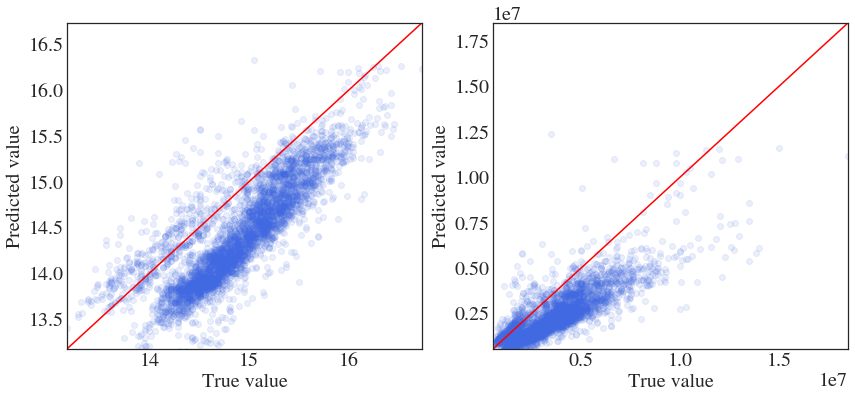

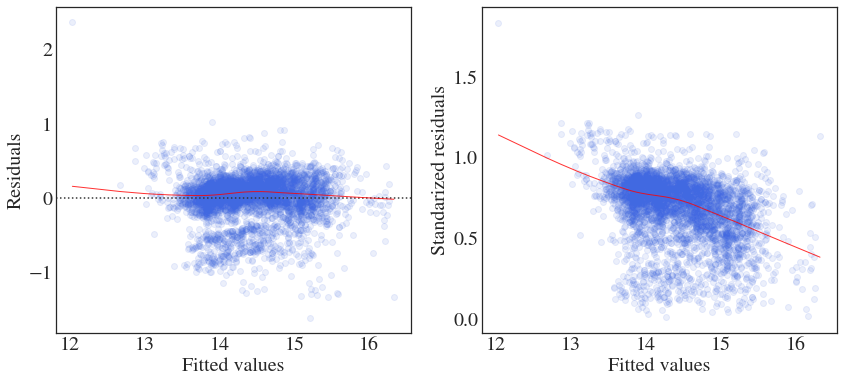

In [67]:
#################################
########## RELOAD DATA ##########

#################################
########    y_test_off   ########
#################################
# Remove NAN values in OffVurdering (4526 - 4509 = 17)
Test = Test.dropna(axis=0, subset=['OffVurdering'])
y_test = Test['SalePrice']
y_test_askprice = Test['AskingPrice']
y_test_AVM = Test['GeomaticAVMPrice']
y_test_off = Test['OffVurdering']
X_test = Test.drop(columns=['SalePrice', 'AskingPrice', 'GeomaticAVMPrice', 'OffVurdering', 'SaleDate'])

score_SKAT = get_score(y_test, y_test_off)

y_plot_blue(y_test, y_test_off)
ResidualPlots(y_test, y_test_off)

#print(get_score(y_test, y_test_off), 
#      get_score(y_test, y_test_off +0.47))

In [68]:
# No city 
df = pd.read_csv('Endeligt data/df_modell.csv')

# Split into y and X 
y_save = df.loc[:, df.columns.isin(['GeomaticAVMPrice', 'AskingPrice', 'TurnoverTime', 'OfferingEnd', 'OfferingStart', 'SaleDate', 'Time', 'ValDate', 'LandValue', 'TaxableValue', 'Type', 'EnergyLabel', 'MonthSold'])]
y = df.loc[:, df.columns.isin(['SalePrice'])]
X_save = df.loc[:, df.columns.isin(['LinkGeo', 'LinkBoligsiden', 'Address'])]
X = df.loc[:, ~df.columns.isin(['SaleDateNum','RadonRisk','LinkGeo', 'LinkBoligsiden', 'Address', 'Lokation', 'Quarter', 'Year','YearQuarter','SalePrice', 'TurnoverTime', 'OfferingEnd', 'OfferingStart', 'SaleDate', 'Time', 'ValDate', 'Latitude', 'Longitude', 'LandValue', 'TaxableValue'])]
df = pd.concat([y, X], axis=1)


# Do something with Neighbors
print(df.Neighbors.isnull().sum())
df['Neighbors'] = df['Neighbors'].fillna(0)
print(df.Neighbors.isnull().sum())

# Any zeros?
#print(df.isnull().values.any())
#df.dropna(inplace=True)


# Splittig into train and test data
df['SaleDate'] = pd.to_datetime(y_save['SaleDate'],format='%Y-%m-%d', errors='coerce')
#valdate = datetime.datetime(2019, 4, 3)
valdate = datetime.datetime(2019, 1, 1)

#log transform other targets:
#df['SalePrice'] = np.log(df['SalePrice'])
df['AskingPrice'] = np.log(y_save['AskingPrice'])
df['GeomaticAVMPrice'] = np.log(y_save['GeomaticAVMPrice'])
df['OffVurdering'] = np.log(y_save['LandValue'] + y_save['TaxableValue'])
df['Type'] = y_save['Type']
df['EnergyLabel'] = y_save['EnergyLabel']
df['MonthSold'] = y_save['MonthSold']

#df = df[df['SalePrice'].between(df['SalePrice'].quantile(.05), df['SalePrice'].quantile(.95))] # without outliers

Test = df[df.SaleDate > valdate]

y_test = Test['SalePrice']
y_test_askprice = Test['AskingPrice']
y_test_AVM = Test['GeomaticAVMPrice']
y_test_off = Test['OffVurdering']
y_test_type = Test['Type']
y_test_EnergyLabel = Test['EnergyLabel']
y_test_MonthSold = Test['MonthSold']


X_test = Test.drop(columns=['SalePrice', 'AskingPrice', 'GeomaticAVMPrice', 'OffVurdering', 'SaleDate', 'Type'])

Train = df[df.SaleDate <= valdate]
y_train = Train['SalePrice']
y_train_askprice = Train['AskingPrice']
y_train_type = Train['Type']
X_train = Train.drop(columns=['SalePrice', 'AskingPrice', 'GeomaticAVMPrice', 'OffVurdering', 'SaleDate', 'Type'])

print( str(Train.shape[0]+ Test.shape[0]) + ' er lig ' + str(len(df)))

print(y_test.shape, X_test.shape)
print(y_train.shape, X_train.shape)

677
0
35702 er lig 35702
(4504,) (4504, 159)
(31198,) (31198, 159)


In [69]:
comp_data = {'Asking Price': [score_Asking[0], score_Asking[1], score_Asking[2], score_Asking[3]],
             'SKAT':         [score_SKAT[0]  , score_SKAT[1]  , score_SKAT[2]  , score_SKAT[3]],
             'AVM':          [score_AVM[0]   , score_AVM[1]   , score_AVM[2]   , score_AVM[3]]
             }


comp_overview = pd.DataFrame.from_dict(comp_data, 
                                  orient='index', 
                                  columns=['MSE', 'MAE', 'R-squared', 'Removed obs'])

comp_overview

#print(comp_overview.to_latex(index=True))  

MSE       MAE  R-squared  Removed obs
Asking Price  0.045177  0.096656   0.836471            0
SKAT          0.327506  0.516675  -0.187310           16
AVM           0.063786  0.098177   0.768728           12

In [70]:
#################################
############## NEW ##############
#################################

data = {'OLS':   [score_OLS[0],     score_OLS[1],    score_OLS[2],    score_OLS[3],  ''], 
        'Ridge': [score_ridge[0],   score_ridge[1],  score_ridge[2],  score_ridge[3], 'Lambda = %0.000f'% model_best_ridge.alpha],
        'Lasso': [score_lasso[0],   score_lasso[1],  score_lasso[2],  score_lasso[3], 'Lambda = %0.3f'% model_best_lasso.alpha],
        'Elastic Net':[score_ENet[0],   score_ENet[1],  score_ENet[2],  score_ENet[3], 'Lambda = %0.3f'% model_best_ENet.alpha ]  ,
        'Decision Tree':   [score_Tree[0], score_Tree[1],    score_Tree[2],    score_Tree[3],    ''],
        'Random Forest':   [score_RF[0],     score_RF[1],    score_RF[2],    score_RF[3],    ''],
        '':   ['',     '',  '',    '',    ''],
        'Asking price':[score_Asking[0], '',  score_Asking[2], '',   'Missing obs = %0.00f'% score_Asking[3]],
        'SKAT':  [score_SKAT[0], '',  score_SKAT[2], '',   'Missing obs = %0.00f'% score_SKAT[3]],
        'Geomatic AVM':   [score_AVM[0],  '',   score_AVM[2], '' ,   'Missing obs = %0.00f'% score_AVM[3]]
       }


overview = pd.DataFrame.from_dict(data, 
                                  orient='index', 
                                  columns=['MSE (test)', 'MSE (train)', 'MAE (test)', 'MAE (train)', 'Details'])

overview = overview.drop(columns=['MAE (test)', 'MAE (train)'], axis=1)

In [71]:
print(overview.to_latex(float_format=lambda x: '%.6f' % x, index=True))  

\begin{tabular}{llll}
\toprule
{} & MSE (test) & MSE (train) &           Details \\
\midrule
OLS           &   0.072434 &    0.052190 &                   \\
Ridge         &   0.072421 &    0.052228 &      Lambda = 220 \\
Lasso         &   0.072374 &    0.052407 &    Lambda = 0.001 \\
Elastic Net   &   0.072333 &    0.052411 &    Lambda = 0.002 \\
Decision Tree &   0.077227 &    0.054104 &                   \\
Random Forest &   0.073732 &    0.043129 &                   \\
              &            &             &                   \\
Asking price  &   0.045177 &             &   Missing obs = 0 \\
SKAT          &   0.327506 &             &  Missing obs = 16 \\
Geomatic AVM  &   0.063786 &             &  Missing obs = 12 \\
\bottomrule
\end{tabular}



In [72]:
def percentwrong(y_test, y_pred):
    y_test = np.exp(y_test)
    y_pred = np.exp(y_pred)
    result = np.mean(abs(y_test - y_pred) / y_test)*100
    return result

print(percentwrong(y_test, y_OLS))
print(percentwrong(y_test, y_ridge))
print(percentwrong(y_test, y_lasso))
print(percentwrong(y_test, y_ENet))
print(percentwrong(y_test, y_Tree))
print(percentwrong(y_test, y_RF))


print(percentwrong(y_test, y_test_AVM))
print(percentwrong(y_test, y_test_off))
print(percentwrong(y_test, y_test_askprice))



20.64015328415394
20.613378975077257
20.625628328159053
20.620999236394628
21.67014095942724
20.870548890826065
13.768559180151707
39.536521226193955
11.821026013812501


In [73]:
def within20(y_pred):
    dataset = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test, 'Type':y_test_type}, columns=['y_pred', 'y_test','Type'])
    dataset['exp_y_pred'] = np.exp(dataset.y_pred)
    dataset['exp_y_test'] = np.exp(dataset.y_test)
    dataset['difference'] = abs(dataset.exp_y_test-dataset.exp_y_pred)
    dataset['diffpercent'] = dataset.difference / dataset.exp_y_test *100
    return (len(dataset[dataset.diffpercent < 20]) / len(dataset)) *100


#################################
############## NEW ##############
#################################

data = {'OLS':             [within20(y_OLS)], 
        'Ridge':           [within20(y_ridge)],
        'Lasso':           [within20(y_lasso)],
        'Elastic Net':     [within20(y_ENet)],
        'Decision Tree':   [within20(y_Tree)],
        'Random Forest':   [within20(y_RF)],
        '':                [''],
        'Asking price':    [within20(y_test_askprice)],
        'SKAT':            [within20(y_test_off)],
        'Geomatic AVM':    [within20(y_test_AVM)]
       }


overview = pd.DataFrame.from_dict(data, 
                                  orient='index', 
                                  columns=['Within +-20% of actual price'])

overview.T



OLS   Ridge    Lasso Elastic Net  \
Within +-20% of actual price  77.9973  78.397  78.2416      78.286   

                             Decision Tree Random Forest   Asking price  \
Within +-20% of actual price        73.246            75        87.6776   

                                 SKAT Geomatic AVM  
Within +-20% of actual price  12.6776      86.0568

## CHECK VALUES THAT ARE UNDER 

In [74]:
df11 = X_test[y_test - y_OLS <-0.3]
df12 = X_test[y_test - y_OLS >-0.3]

In [76]:
aa = (np.mean(df11) - np.mean(df12)) 
aa.sort_values(ascending=True)

Metro                                                                -0.196945
PublicBath                                                           -0.183374
Hospital                                                             -0.159289
LargestParty_socialdemokratiet                                       -0.157839
Train                                                                -0.156235
Coast                                                                -0.152394
Doctor                                                               -0.147560
ZipCode_range_2720                                                   -0.140779
Bathrooms                                                            -0.135485
ZipCode_range_2400                                                   -0.132108
BusStop                                                              -0.131358
Toilets                                                              -0.130804
VoteDistrict_2. Syd                                 

In [77]:
aa['WeightedFloorArea']

-0.07314369253485947

In [78]:

np.mean(df11['WeightedFloorArea']) / np.var(df11['WeightedFloorArea'])

-0.1872924136643114